In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences # Ìå®Îî©

In [2]:
data = pd.read_csv('spam.csv', encoding='latin1')
data

v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will √å_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  
2           NaN        NaN  
3           NaN        NaN  
4           NaN        NaN  
...         ...        ...  
5567        NaN        NaN  
5568        NaN        NaN  
5569        NaN        NaN  
5570        NaN        NaN  
5571        NaN        NaN  

[5572 rows x 5 columns]

In [3]:
print('Ï¥ù ÏÉòÌîåÏùò Ïàò :',len(data))

Ï¥ù ÏÉòÌîåÏùò Ïàò : 5572


In [4]:
# 2~4Ïó¥ ÏÇ≠Ï†ú
del data['Unnamed: 2']
del data['Unnamed: 3']
del data['Unnamed: 4']

In [5]:
data

v1                                                 v2
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will √å_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]

In [6]:
# 0Í≥º 1Î°ú Î≥ÄÌòï
data['v1'] = data['v1'].replace(['ham','spam'],[0,1])

In [7]:
data

v1                                                 v2
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...
...   ..                                                ...
5567   1  This is the 2nd time we have tried 2 contact u...
5568   0              Will √å_ b going to esplanade fr home?
5569   0  Pity, * was in mood for that. So...any other s...
5570   0  The guy did some bitching but I acted like i'd...
5571   0                         Rofl. Its true to its name

[5572 rows x 2 columns]

In [8]:
print('v2Ïó¥Ïùò Ïú†ÎãàÌÅ¨Ìïú Í∞í :',data['v2'].nunique())

v2Ïó¥Ïùò Ïú†ÎãàÌÅ¨Ìïú Í∞í : 5169


In [9]:
data.drop_duplicates(subset=['v2'], inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5169 non-null   int64 
 1   v2      5169 non-null   object
dtypes: int64(1), object(1)
memory usage: 121.1+ KB


In [11]:
data.groupby('v1')

In [12]:
data.groupby('v1').count()

v2
v1      
0   4516
1    653

In [13]:
data

v1                                                 v2
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...
...   ..                                                ...
5567   1  This is the 2nd time we have tried 2 contact u...
5568   0              Will √å_ b going to esplanade fr home?
5569   0  Pity, * was in mood for that. So...any other s...
5570   0  The guy did some bitching but I acted like i'd...
5571   0                         Rofl. Its true to its name

[5169 rows x 2 columns]

In [14]:
X_data = data['v2']
y_data = data['v1']

In [15]:
# stratify : ÎèôÏùºÌïú ÎπÑÏú®Î°ú ÎÇòÎàÑÎäî Í≤É ( Ï∏µÌôîÏ∂îÏ∂ú)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=0, stratify=y_data)

In [16]:
X_train

1882                     Sorry, I can't help you on this.
4948                    I am in bus on the way to calicut
4460    Thanks again for your reply today. When is ur ...
4851                               I liked your new house
201     Hello darlin ive finished college now so txt m...
                              ...                        
1971                          Enjoy ur life. . Good night
3701    Hey loverboy! I love you !! I had to tell ... ...
2809                 Mm so you asked me not to call radio
1229                      Jus ans me lar. U'll noe later.
2531    What's happening with you. Have you gotten a j...
Name: v2, Length: 4135, dtype: object

In [17]:
X_test

4183    I just really need shit before tomorrow and I ...
108     I know! Grumpy old people. My mom was like you...
5237    Someonone you know is trying to contact you vi...
1858                     Sir, i am waiting for your call.
3603            Hey morning what you come to ask:-) pa...
                              ...                        
2086                  Dude how do you like the buff wind.
5548                   No, I was trying it all weekend ;V
2254                              Ok. Me watching tv too.
3593    Do you want a New Nokia 3510i Colour Phone Del...
1174    Yay! You better not have told that to 5 other ...
Name: v2, Length: 1034, dtype: object

In [18]:
y_train

1882    0
4948    0
4460    0
4851    0
201     0
       ..
1971    0
3701    0
2809    0
1229    0
2531    0
Name: v1, Length: 4135, dtype: int64

In [19]:
y_test

4183    0
108     0
5237    1
1858    0
3603    0
       ..
2086    0
5548    0
2254    0
3593    1
1174    0
Name: v1, Length: 1034, dtype: int64

In [20]:
# ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†Ä ÎßåÎì§Í∏∞, Í∞ùÏ≤¥Ïùº Îøê
tokenizer = Tokenizer()

In [21]:
tokenizer
# ÏΩîÌçºÏä§Ïóê ÏûàÎäî ÌÖçÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î°úÎ∂ÄÌÑ∞ ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†ÄÎ•º ÏÉùÏÑ±

In [22]:
tokenizer.fit_on_texts(X_train)

In [23]:
len(tokenizer.index_word)

7821

In [24]:
tokenizer.index_word 

{1: 'i',
 2: 'to',
 3: 'you',
 4: 'a',
 5: 'the',
 6: 'u',
 7: 'and',
 8: 'in',
 9: 'is',
 10: 'me',
 11: 'my',
 12: 'for',
 13: 'your',
 14: 'it',
 15: 'of',
 16: 'have',
 17: 'on',
 18: 'call',
 19: 'that',
 20: 'are',
 21: '2',
 22: 'now',
 23: 'so',
 24: 'but',
 25: 'not',
 26: 'can',
 27: 'or',
 28: "i'm",
 29: 'get',
 30: 'at',
 31: 'do',
 32: 'if',
 33: 'be',
 34: 'will',
 35: 'just',
 36: 'with',
 37: 'we',
 38: 'no',
 39: 'this',
 40: 'ur',
 41: 'up',
 42: '4',
 43: 'how',
 44: 'gt',
 45: 'lt',
 46: 'go',
 47: 'when',
 48: 'from',
 49: 'what',
 50: 'ok',
 51: 'out',
 52: 'know',
 53: 'free',
 54: 'all',
 55: 'like',
 56: 'then',
 57: 'got',
 58: 'good',
 59: 'am',
 60: 'time',
 61: 'was',
 62: 'come',
 63: 'its',
 64: 'love',
 65: 'want',
 66: 'text',
 67: 'he',
 68: 'only',
 69: 'there',
 70: 'day',
 71: 'need',
 72: 'going',
 73: 'lor',
 74: 'send',
 75: 'one',
 76: 'as',
 77: 'home',
 78: 'about',
 79: 'back',
 80: 'still',
 81: 'k',
 82: 'see',
 83: 'txt',
 84: 'by',
 85: 

In [25]:
# Îã®Ïñ¥ÎßàÎã§ Î™áÍ∞úÍ∞Ä ÏûàÎäîÏßÄ ÌôïÏù∏
tokenizer.word_counts

OrderedDict([('sorry', 101),
             ('i', 1832),
             ("can't", 47),
             ('help', 44),
             ('you', 1644),
             ('on', 404),
             ('this', 258),
             ('am', 171),
             ('in', 664),
             ('bus', 22),
             ('the', 1003),
             ('way', 75),
             ('to', 1679),
             ('calicut', 2),
             ('thanks', 65),
             ('again', 55),
             ('for', 525),
             ('your', 519),
             ('reply', 105),
             ('today', 108),
             ('when', 221),
             ('is', 643),
             ('ur', 256),
             ('visa', 1),
             ('coming', 41),
             ('and', 754),
             ('r', 113),
             ('u', 859),
             ('still', 125),
             ('buying', 5),
             ('gucci', 1),
             ('bags', 2),
             ('my', 551),
             ('sister', 13),
             ('things', 31),
             ('are', 383),
             ('no

In [26]:
#Ïù∏Îç±Ïä§Î°ú Î≥ÄÌôòÎê®
X_train_encoded=tokenizer.texts_to_sequences(X_train)
print(X_train_encoded)

[[102, 1, 210, 230, 3, 17, 39], [1, 59, 8, 427, 17, 5, 137, 2, 2326], [157, 180, 12, 13, 98, 93, 47, 9, 40, 3485, 247, 8, 7, 87, 6, 80, 1312, 5, 3486, 7, 2327, 11, 660, 306, 20, 25, 467, 708, 1028, 203, 129, 193, 800, 2328, 23, 1, 144, 71, 2, 111, 78, 43, 2, 130, 11, 800, 186, 122, 1512], [1, 1154, 13, 104, 292], [222, 622, 857, 540, 623, 22, 23, 83, 10, 47, 6, 257, 32, 6, 26, 64, 936, 407], [96, 18, 3487, 937, 76, 69, 9, 146, 183, 168, 251, 12, 3], [1, 52, 661, 248, 801, 7, 2329, 52, 1, 57, 14, 408, 468, 3, 58, 112], [171, 16, 3, 522, 1155, 12, 104, 449], [1, 450, 29, 40, 541, 134, 3488, 9, 523, 74, 14, 180], [709, 223, 115, 1, 390, 2, 89, 3, 25, 2, 89, 10, 13, 1812, 166, 14, 316, 130, 10, 1313, 24, 63, 3489, 10, 23, 157, 12, 3490], [140, 1, 1156, 4, 710, 15, 566, 17, 1314, 349, 80, 711, 624, 119, 28, 35, 1315, 41], [58, 280, 34, 31], [145, 3, 128, 1, 111, 3, 26, 252, 13, 44, 3491, 22, 2, 2330, 25, 173, 24, 32, 349, 469, 1, 26, 230, 172, 10, 52, 24, 47, 3, 31, 33, 173, 3, 20, 281], [3

In [27]:
word_to_index = tokenizer.word_index
word_to_index

{'i': 1,
 'to': 2,
 'you': 3,
 'a': 4,
 'the': 5,
 'u': 6,
 'and': 7,
 'in': 8,
 'is': 9,
 'me': 10,
 'my': 11,
 'for': 12,
 'your': 13,
 'it': 14,
 'of': 15,
 'have': 16,
 'on': 17,
 'call': 18,
 'that': 19,
 'are': 20,
 '2': 21,
 'now': 22,
 'so': 23,
 'but': 24,
 'not': 25,
 'can': 26,
 'or': 27,
 "i'm": 28,
 'get': 29,
 'at': 30,
 'do': 31,
 'if': 32,
 'be': 33,
 'will': 34,
 'just': 35,
 'with': 36,
 'we': 37,
 'no': 38,
 'this': 39,
 'ur': 40,
 'up': 41,
 '4': 42,
 'how': 43,
 'gt': 44,
 'lt': 45,
 'go': 46,
 'when': 47,
 'from': 48,
 'what': 49,
 'ok': 50,
 'out': 51,
 'know': 52,
 'free': 53,
 'all': 54,
 'like': 55,
 'then': 56,
 'got': 57,
 'good': 58,
 'am': 59,
 'time': 60,
 'was': 61,
 'come': 62,
 'its': 63,
 'love': 64,
 'want': 65,
 'text': 66,
 'he': 67,
 'only': 68,
 'there': 69,
 'day': 70,
 'need': 71,
 'going': 72,
 'lor': 73,
 'send': 74,
 'one': 75,
 'as': 76,
 'home': 77,
 'about': 78,
 'back': 79,
 'still': 80,
 'k': 81,
 'see': 82,
 'txt': 83,
 'by': 84,
 'da'

In [28]:
len(word_to_index)

7821

In [29]:
tokenizer.word_counts.items() # ÌÇ§, Î∞∏Î•ò

odict_items([('sorry', 101), ('i', 1832), ("can't", 47), ('help', 44), ('you', 1644), ('on', 404), ('this', 258), ('am', 171), ('in', 664), ('bus', 22), ('the', 1003), ('way', 75), ('to', 1679), ('calicut', 2), ('thanks', 65), ('again', 55), ('for', 525), ('your', 519), ('reply', 105), ('today', 108), ('when', 221), ('is', 643), ('ur', 256), ('visa', 1), ('coming', 41), ('and', 754), ('r', 113), ('u', 859), ('still', 125), ('buying', 5), ('gucci', 1), ('bags', 2), ('my', 551), ('sister', 13), ('things', 31), ('are', 383), ('not', 336), ('easy', 20), ('uncle', 12), ('john', 7), ('also', 48), ('has', 79), ('his', 50), ('own', 10), ('bills', 2), ('so', 353), ('really', 71), ('need', 142), ('think', 93), ('about', 126), ('how', 235), ('make', 79), ('money', 52), ('later', 84), ('sha', 4), ('liked', 6), ('new', 100), ('house', 33), ('hello', 45), ('darlin', 14), ('ive', 9), ('finished', 17), ('college', 14), ('now', 360), ('txt', 119), ('me', 614), ('finish', 39), ('if', 297), ('can', 326),

In [30]:
total_cnt = len(word_to_index)

In [31]:
# Îì±Ïû•ÎπàÎèÑÏàò, Ïù¥Í≤ÉÎ≥¥Îã§ ÏûëÏùÄÍ≤å Î™áÍ∞úÏù∏ÏßÄ ÌôïÏù∏ÌïòÎäîÍ≤É
threshold = 2

In [32]:
rare_cnt = 0 # Îì±Ïû• ÎπàÎèÑÏàòÍ∞Ä thresholdÎ≥¥Îã§ ÏûëÏùÄ Îã®Ïñ¥Ïùò Í∞úÏàòÎ•º Ïπ¥Ïö¥Ìä∏
total_freq = 0 # ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïùò Ï†ÑÏ≤¥ Îã®Ïñ¥ ÎπàÎèÑÏàò Ï¥ù Ìï©
rare_freq = 0 # Îì±Ïû• ÎπàÎèÑÏàòÍ∞Ä thresholdÎ≥¥Îã§ ÏûëÏùÄ Îã®Ïñ¥Ïùò Îì±Ïû• ÎπàÎèÑÏàòÏùò Ï¥ù Ìï©

In [33]:
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

In [34]:
total_freq

65145

In [35]:
rare_cnt

4337

In [36]:
rare_freq

4337

In [37]:
# Ï†ÑÏ≤¥ Îã®Ïñ¥Ï§ëÏóêÏÑú Îì±Ïû• ÎπàÎèÑÏàòÍ∞Ä 1Ïù∏ Îã®Ïñ¥Ïùò ÎπÑÏú®
rare_cnt/total_cnt

0.5545326684567191

In [38]:
# Ï†ÑÏ≤¥ Îì±Ïû• ÎπàÎèÑÏóêÏÑú Îì±Ïû• ÎπàÎèÑÏàòÍ∞Ä 1Ïù∏ Îã®Ïñ¥ Îì±Ïû• ÎπÑÏú®
(rare_freq/total_freq)*100

6.65745644331875

ÏúÑ Ï≤òÎüº Îì±Ïû• ÎπàÏàòÍ∞Ä ÎÇÆÏùÄ Í≤ÉÎì§ÏùÄ ÏûêÏó∞Ïñ¥ Ï≤òÎ¶¨ÏóêÏÑú Ï†úÍ±∞ Ìï† Ïàò ÏûàÏùå

In [39]:
tokenizer_over2 = Tokenizer(num_words=total_cnt-rare_cnt+1)
tokenizer_over2.fit_on_texts(X_train)

In [40]:
len(tokenizer_over2.index_word)

7821

In [41]:
total_cnt

7821

In [42]:
rare_cnt

4337

In [43]:
total_cnt-rare_cnt

3484

In [44]:
sentences = [
    'I love my dog',
    'I, love my cat',
    'You love my dog!'
]

tokenizer3 = Tokenizer(num_words=4)

In [45]:
tokenizer3.fit_on_texts(sentences)
word_index = tokenizer3.word_index
word_index

{'love': 1, 'my': 2, 'i': 3, 'dog': 4, 'cat': 5, 'you': 6}

In [46]:
seq = tokenizer3.texts_to_sequences(sentences)
print(word_index)  # {'love': 1, 'my': 2, 'i': 3, 'dog': 4, 'cat': 5, 'you': 6}
print(seq) # num_wordsÍ∞Ä 4Îùº 3ÍπåÏßÄÎßå ÎÇòÏôÄÏÑú dogÏù¥ ÏïàÎÇòÏò¥

{'love': 1, 'my': 2, 'i': 3, 'dog': 4, 'cat': 5, 'you': 6}
[[3, 1, 2], [3, 1, 2], [1, 2]]


In [47]:
sentences = [
    'I love my dog',
    'I, love my cat',
    'You love my dog!'
]

tokenizer3 = Tokenizer(num_words=5)

In [48]:
tokenizer3.fit_on_texts(sentences)
word_index = tokenizer3.word_index
word_index

{'love': 1, 'my': 2, 'i': 3, 'dog': 4, 'cat': 5, 'you': 6}

In [49]:
seq = tokenizer3.texts_to_sequences(sentences)
print(word_index)  # {'love': 1, 'my': 2, 'i': 3, 'dog': 4, 'cat': 5, 'you': 6}
print(seq) 

{'love': 1, 'my': 2, 'i': 3, 'dog': 4, 'cat': 5, 'you': 6}
[[3, 1, 2, 4], [3, 1, 2], [1, 2, 4]]


In [50]:
X_train_encoded

[[102, 1, 210, 230, 3, 17, 39],
 [1, 59, 8, 427, 17, 5, 137, 2, 2326],
 [157,
  180,
  12,
  13,
  98,
  93,
  47,
  9,
  40,
  3485,
  247,
  8,
  7,
  87,
  6,
  80,
  1312,
  5,
  3486,
  7,
  2327,
  11,
  660,
  306,
  20,
  25,
  467,
  708,
  1028,
  203,
  129,
  193,
  800,
  2328,
  23,
  1,
  144,
  71,
  2,
  111,
  78,
  43,
  2,
  130,
  11,
  800,
  186,
  122,
  1512],
 [1, 1154, 13, 104, 292],
 [222,
  622,
  857,
  540,
  623,
  22,
  23,
  83,
  10,
  47,
  6,
  257,
  32,
  6,
  26,
  64,
  936,
  407],
 [96, 18, 3487, 937, 76, 69, 9, 146, 183, 168, 251, 12, 3],
 [1, 52, 661, 248, 801, 7, 2329, 52, 1, 57, 14, 408, 468, 3, 58, 112],
 [171, 16, 3, 522, 1155, 12, 104, 449],
 [1, 450, 29, 40, 541, 134, 3488, 9, 523, 74, 14, 180],
 [709,
  223,
  115,
  1,
  390,
  2,
  89,
  3,
  25,
  2,
  89,
  10,
  13,
  1812,
  166,
  14,
  316,
  130,
  10,
  1313,
  24,
  63,
  3489,
  10,
  23,
  157,
  12,
  3490],
 [140,
  1,
  1156,
  4,
  710,
  15,
  566,
  17,
  1314,
  34

In [51]:
X_train_encoded

[[102, 1, 210, 230, 3, 17, 39],
 [1, 59, 8, 427, 17, 5, 137, 2, 2326],
 [157,
  180,
  12,
  13,
  98,
  93,
  47,
  9,
  40,
  3485,
  247,
  8,
  7,
  87,
  6,
  80,
  1312,
  5,
  3486,
  7,
  2327,
  11,
  660,
  306,
  20,
  25,
  467,
  708,
  1028,
  203,
  129,
  193,
  800,
  2328,
  23,
  1,
  144,
  71,
  2,
  111,
  78,
  43,
  2,
  130,
  11,
  800,
  186,
  122,
  1512],
 [1, 1154, 13, 104, 292],
 [222,
  622,
  857,
  540,
  623,
  22,
  23,
  83,
  10,
  47,
  6,
  257,
  32,
  6,
  26,
  64,
  936,
  407],
 [96, 18, 3487, 937, 76, 69, 9, 146, 183, 168, 251, 12, 3],
 [1, 52, 661, 248, 801, 7, 2329, 52, 1, 57, 14, 408, 468, 3, 58, 112],
 [171, 16, 3, 522, 1155, 12, 104, 449],
 [1, 450, 29, 40, 541, 134, 3488, 9, 523, 74, 14, 180],
 [709,
  223,
  115,
  1,
  390,
  2,
  89,
  3,
  25,
  2,
  89,
  10,
  13,
  1812,
  166,
  14,
  316,
  130,
  10,
  1313,
  24,
  63,
  3489,
  10,
  23,
  157,
  12,
  3490],
 [140,
  1,
  1156,
  4,
  710,
  15,
  566,
  17,
  1314,
  34

In [52]:
print('Î©îÏùºÏùò ÏµúÎåÄ Í∏∏Ïù¥ : %d' % max(len(sample) for sample in X_train_encoded))

Î©îÏùºÏùò ÏµúÎåÄ Í∏∏Ïù¥ : 189


In [53]:
print('Î©îÏùºÏùò ÌèâÍ∑† Í∏∏Ïù¥ : %f' % (sum(map(len, X_train_encoded))/len(X_train_encoded)))

Î©îÏùºÏùò ÌèâÍ∑† Í∏∏Ïù¥ : 15.754534


In [54]:
sum(map(len, X_train_encoded))

65145

(array([1.390e+02, 1.361e+03, 9.540e+02, 6.010e+02, 4.370e+02, 2.840e+02,
        2.970e+02, 3.580e+02, 5.460e+02, 6.700e+01, 2.700e+01, 1.400e+01,
        1.800e+01, 1.200e+01, 5.000e+00, 1.300e+01, 8.000e+00, 4.000e+00,
        4.000e+00, 1.000e+00, 5.000e+00, 1.000e+00, 2.000e+00, 1.000e+00,
        2.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([  2.  ,  20.16,  38.32,  56.48,  74.64,  92.8 , 110.96, 129.12,
        147.28, 165.44, 183.6 , 201.76, 219.92, 238.08, 256.24, 274.4 ,
        292.56, 310.72, 328.88, 347.04, 365.2 , 383.36, 401.52, 419.68,
        437.84, 456.  , 474.16, 492.32, 510.48, 528.64, 546.8 , 564.96,
        583.12, 601.28, 619.44, 637.6 , 655.76, 673.92, 692.08, 710.24,
        728.4 , 

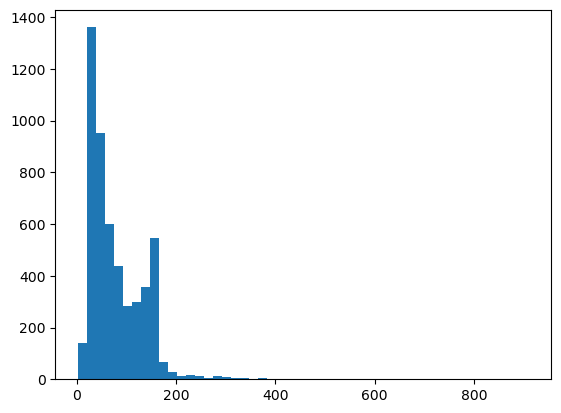

In [55]:
plt.hist([len(sample) for sample in X_data], bins=50)

In [56]:
X_train_padded=pad_sequences(X_train_encoded, maxlen =189)

In [57]:
X_train_padded

array([[   0,    0,    0, ...,    3,   17,   39],
       [   0,    0,    0, ...,  137,    2, 2326],
       [   0,    0,    0, ...,  186,  122, 1512],
       ...,
       [   0,    0,    0, ...,    2,   18, 1604],
       [   0,    0,    0, ..., 1297,  560,  122],
       [   0,    0,    0, ...,   12, 7820, 7821]])

In [58]:
X_train_padded.shape

(4135, 189)

In [59]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

embedding_dim = 32
hidden_units = 32

In [60]:
len(word_to_index)

7821

In [61]:
word_to_index

{'i': 1,
 'to': 2,
 'you': 3,
 'a': 4,
 'the': 5,
 'u': 6,
 'and': 7,
 'in': 8,
 'is': 9,
 'me': 10,
 'my': 11,
 'for': 12,
 'your': 13,
 'it': 14,
 'of': 15,
 'have': 16,
 'on': 17,
 'call': 18,
 'that': 19,
 'are': 20,
 '2': 21,
 'now': 22,
 'so': 23,
 'but': 24,
 'not': 25,
 'can': 26,
 'or': 27,
 "i'm": 28,
 'get': 29,
 'at': 30,
 'do': 31,
 'if': 32,
 'be': 33,
 'will': 34,
 'just': 35,
 'with': 36,
 'we': 37,
 'no': 38,
 'this': 39,
 'ur': 40,
 'up': 41,
 '4': 42,
 'how': 43,
 'gt': 44,
 'lt': 45,
 'go': 46,
 'when': 47,
 'from': 48,
 'what': 49,
 'ok': 50,
 'out': 51,
 'know': 52,
 'free': 53,
 'all': 54,
 'like': 55,
 'then': 56,
 'got': 57,
 'good': 58,
 'am': 59,
 'time': 60,
 'was': 61,
 'come': 62,
 'its': 63,
 'love': 64,
 'want': 65,
 'text': 66,
 'he': 67,
 'only': 68,
 'there': 69,
 'day': 70,
 'need': 71,
 'going': 72,
 'lor': 73,
 'send': 74,
 'one': 75,
 'as': 76,
 'home': 77,
 'about': 78,
 'back': 79,
 'still': 80,
 'k': 81,
 'see': 82,
 'txt': 83,
 'by': 84,
 'da'

In [62]:
vocab_size=len(word_to_index)+1 # Ìå®Îî© ÌÜ†ÌÅ∞ 0Î≤àÏù¥ ÏÇ¨Ïö©ÎêòÎØÄÎ°ú 1ÏùÑ ÎçîÌï®

In [63]:
word_to_index

{'i': 1,
 'to': 2,
 'you': 3,
 'a': 4,
 'the': 5,
 'u': 6,
 'and': 7,
 'in': 8,
 'is': 9,
 'me': 10,
 'my': 11,
 'for': 12,
 'your': 13,
 'it': 14,
 'of': 15,
 'have': 16,
 'on': 17,
 'call': 18,
 'that': 19,
 'are': 20,
 '2': 21,
 'now': 22,
 'so': 23,
 'but': 24,
 'not': 25,
 'can': 26,
 'or': 27,
 "i'm": 28,
 'get': 29,
 'at': 30,
 'do': 31,
 'if': 32,
 'be': 33,
 'will': 34,
 'just': 35,
 'with': 36,
 'we': 37,
 'no': 38,
 'this': 39,
 'ur': 40,
 'up': 41,
 '4': 42,
 'how': 43,
 'gt': 44,
 'lt': 45,
 'go': 46,
 'when': 47,
 'from': 48,
 'what': 49,
 'ok': 50,
 'out': 51,
 'know': 52,
 'free': 53,
 'all': 54,
 'like': 55,
 'then': 56,
 'got': 57,
 'good': 58,
 'am': 59,
 'time': 60,
 'was': 61,
 'come': 62,
 'its': 63,
 'love': 64,
 'want': 65,
 'text': 66,
 'he': 67,
 'only': 68,
 'there': 69,
 'day': 70,
 'need': 71,
 'going': 72,
 'lor': 73,
 'send': 74,
 'one': 75,
 'as': 76,
 'home': 77,
 'about': 78,
 'back': 79,
 'still': 80,
 'k': 81,
 'see': 82,
 'txt': 83,
 'by': 84,
 'da'

In [64]:
vocab_size

7822

In [65]:
X_train_padded[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

# RNN ÏÇ¨Ïö©
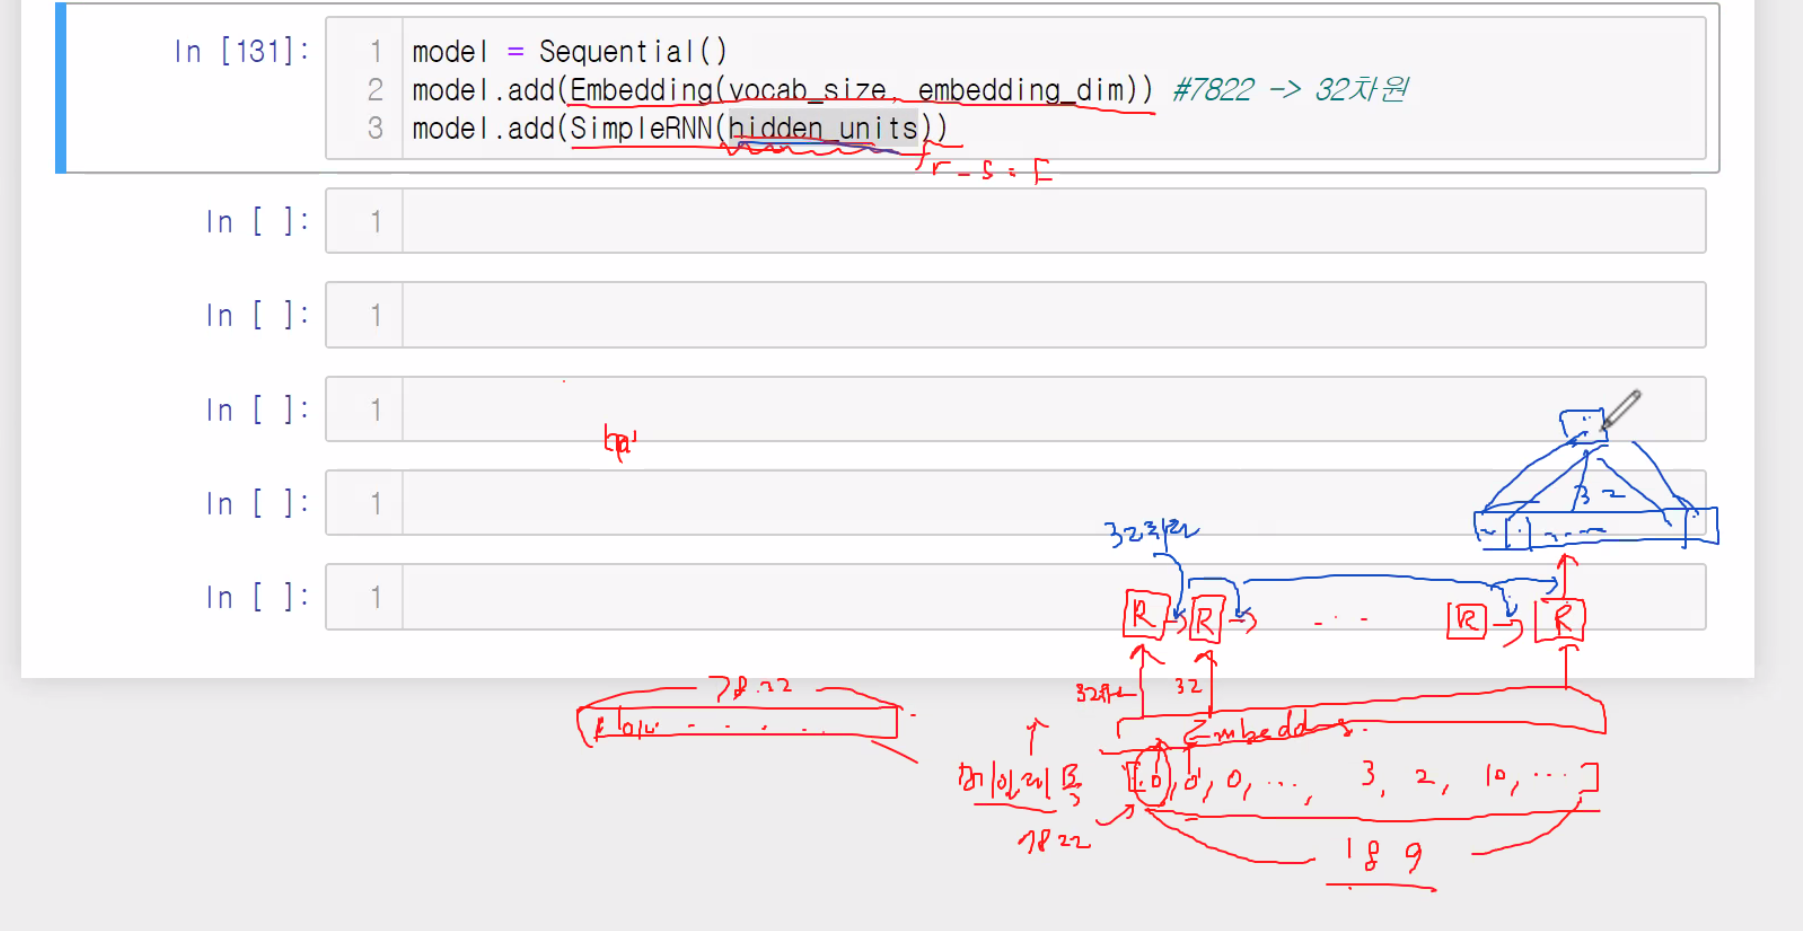
#### Ïä§Ìå∏Ïù∏ÏßÄ, Ïä§Ìå∏Ïù¥ ÏïÑÎãåÏßÄ ÌôïÏù∏ÌïòÎäî Í≤É

In [66]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim)) # 7822 Ï∞®Ïõê(Îã®Ïñ¥ Ï¢ÖÎ•òÍ∞Ä 7822Í∞ú)ÏùÑ 32Ï∞®ÏõêÏúºÎ°ú Ï∂ïÏÜå
model.add(SimpleRNN(hidden_units))
model.add(Dense(1,activation="sigmoid")) # ÏãúÍ∑∏Î™®Ïù¥Îìú Ìï®ÏàòÏù¥ÎØÄÎ°ú 0Í≥º 1 ÏÇ¨Ïù¥Í∞Ä Ï∂úÎ†•

In [67]:
# ÏòµÌã∞ÎßàÏù¥Ï†Ä = rmsprop, lossÎäî 2ÏßÑ ÏóîÌä∏Î°úÌîº
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train_padded, y_train, epochs=4, batch_size=64, validation_split=0.2) # xÌä∏Î†àÏù∏ÏùÑ 8ÎåÄ2

Epoch 1/4
52/52 [==============================] - 2s 24ms/step - loss: 0.4222 - acc: 0.8622 - val_loss: 0.3433 - val_acc: 0.8779
Epoch 2/4
52/52 [==============================] - 1s 20ms/step - loss: 0.2275 - acc: 0.9281 - val_loss: 0.1390 - val_acc: 0.9649
Epoch 3/4
52/52 [==============================] - 1s 20ms/step - loss: 0.0995 - acc: 0.9743 - val_loss: 0.1110 - val_acc: 0.9649
Epoch 4/4
52/52 [==============================] - 1s 20ms/step - loss: 0.0497 - acc: 0.9885 - val_loss: 0.0941 - val_acc: 0.9674


In [68]:
X_test

4183    I just really need shit before tomorrow and I ...
108     I know! Grumpy old people. My mom was like you...
5237    Someonone you know is trying to contact you vi...
1858                     Sir, i am waiting for your call.
3603            Hey morning what you come to ask:-) pa...
                              ...                        
2086                  Dude how do you like the buff wind.
5548                   No, I was trying it all weekend ;V
2254                              Ok. Me watching tv too.
3593    Do you want a New Nokia 3510i Colour Phone Del...
1174    Yay! You better not have told that to 5 other ...
Name: v2, Length: 1034, dtype: object

In [69]:
tokenizer.texts_to_sequences(X_test)

[[1, 35, 144, 71, 376, 194, 169, 7, 1, 52, 3, 619, 33, 1520, 194, 55, 314],
 [1,
  52,
  545,
  318,
  11,
  979,
  61,
  55,
  3,
  302,
  25,
  33,
  56,
  180,
  1,
  59,
  248,
  5,
  75,
  2,
  442],
 [3,
  52,
  9,
  305,
  2,
  219,
  3,
  1153,
  94,
  854,
  286,
  2,
  179,
  51,
  151,
  14,
  211,
  33,
  18,
  48,
  13,
  106,
  27,
  420],
 [364, 1, 59, 251, 12, 13, 18],
 [107, 195, 49, 3, 62, 2, 143, 408],
 [133, 8, 131, 29],
 [53,
  593,
  8,
  21,
  4,
  1021,
  893,
  2,
  224,
  1603,
  841,
  4720,
  324,
  5626,
  66,
  2,
  2,
  411,
  593,
  656,
  1197,
  83,
  461,
  209,
  727,
  396],
 [140, 24, 1, 90, 201, 1, 71, 3, 409, 445],
 [50, 269, 2, 31, 121, 276, 899, 8],
 [64, 14, 1, 65, 2, 19, 932, 1583, 36, 909],
 [410, 1, 16, 4, 104, 3252, 22],
 [223,
  50,
  1,
  4825,
  8,
  2,
  143,
  705,
  170,
  7,
  95,
  178,
  1207,
  114,
  8,
  20,
  3,
  187,
  614,
  39,
  397,
  828],
 [1, 65, 711, 150, 35, 3831, 7],
 [59, 558, 34, 235, 33, 189, 54, 5, 261],
 [145,

In [70]:
X_test_encoded=tokenizer.texts_to_sequences(X_test)
X_test_encoded = pad_sequences(X_test_encoded, maxlen =189)

In [71]:
X_test_encoded

array([[  0,   0,   0, ..., 194,  55, 314],
       [  0,   0,   0, ...,  75,   2, 442],
       [  0,   0,   0, ..., 106,  27, 420],
       ...,
       [  0,   0,   0, ..., 399, 483, 119],
       [  0,   0,   0, ...,  27,  18, 725],
       [  0,   0,   0, ..., 249, 661, 761]])

In [72]:
# 189Í∞úÏùò Îã®Ïñ¥Ïù∏Îç∞ Ìå®Îî©ÏùÑ ÌñàÍ∏∞ ÎïåÎ¨∏Ïóê ÏïûÏóê ÎåÄÎ∂ÄÎ∂Ñ 0ÏúºÎ°ú Ï±ÑÏõåÏßÑ ÏÉÅÌÉú
X_test_encoded.shape

(1034, 189)

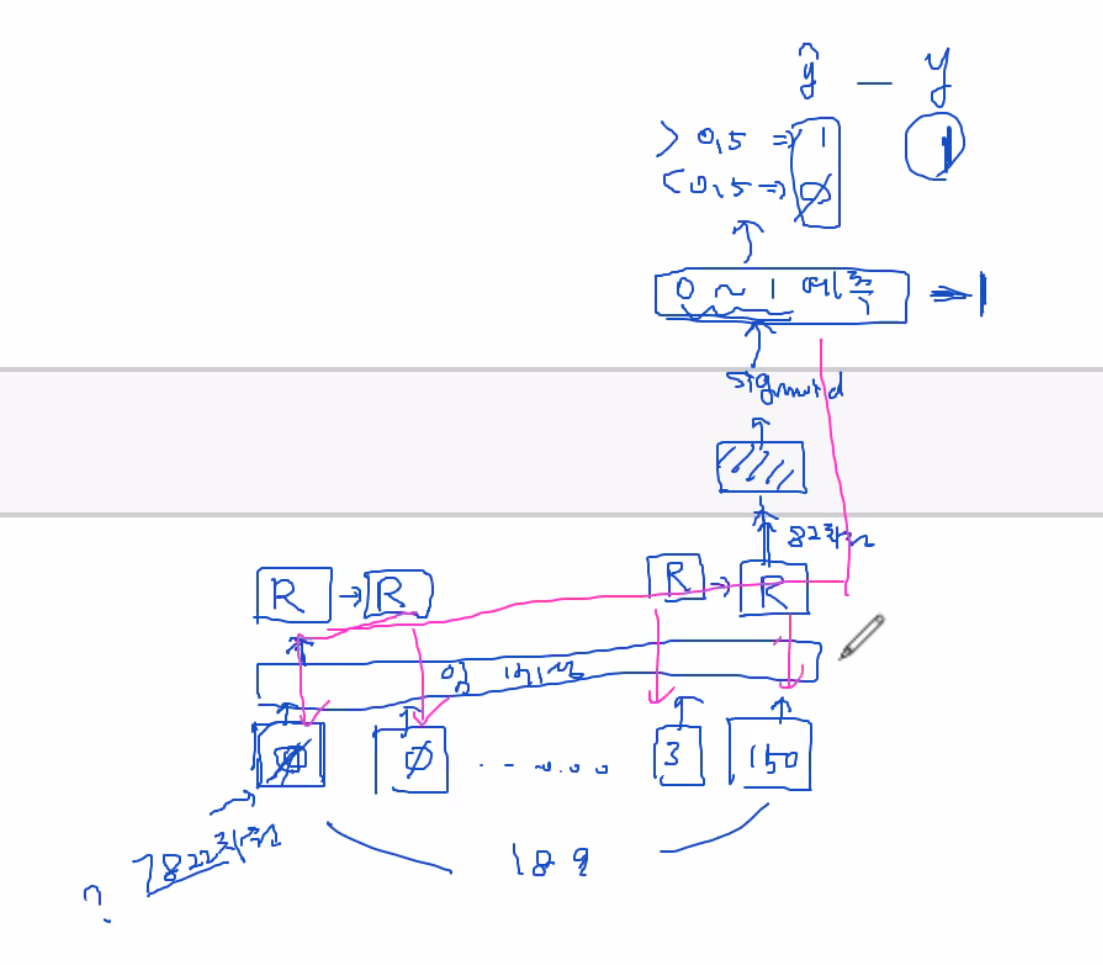

In [73]:
32*33

1056

In [74]:
model.predict(X_test_encoded)

33/33 [==============================] - 0s 5ms/step


array([[0.00737112],
       [0.00719618],
       [0.70518184],
       ...,
       [0.00541886],
       [0.99381614],
       [0.00782625]], dtype=float32)

# Ïó¨Í∏∞Îäî Îã§Î•∏ ÏΩîÎìú

In [75]:
X_test_encoded=tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_encoded, maxlen =189)

In [76]:
print("\n ÌÖåÏä§Ìä∏ Ï†ïÌôïÎèÑ: %.4f" % (model.evaluate(X_test_padded, y_test)[1]))

33/33 [==============================] - 0s 6ms/step - loss: 0.0965 - acc: 0.9749

 ÌÖåÏä§Ìä∏ Ï†ïÌôïÎèÑ: 0.9749


In [77]:
# ÌåÄÏõêÎ≥Ñ Î©îÏùº Ï†úÎ™©/ Î∂ÑÎ•òÍ≤∞Í≥º Îç∞Ïù¥ÌÑ∞ÏÖã Íµ¨ÏÑ±
# Ïä§Ìå∏ Î©îÏùº /  ÌñÑ Î©îÏùº Î∂ÑÎ•òÍ∏∞
# ÎèÑÏ∞© Î©îÏùº -> ÎàÑÍµ¨Ïùò Î©îÏùºÏùºÍπå -> ÏûêÎèô Î∂ÑÎ•ò

In [78]:
X_test_padded.shape

(1034, 189)

In [79]:
# Í≥†Í∞ùÎãò Ïù¥Î≤àÏóê ÏÑ∏ÏùºÏùÑ Ìï©ÎãàÎã§. Î∞©Î¨∏Ìï¥ Ï£ºÏÑ∏Ïöî
# ÌÜ†ÌÅ∞Ìôî -> ÏàòÏπò Î≥ÄÌôò -> Ìå®Îî© -> Î™®Îç∏ ÏûÖÎ†• -> Í≤∞Í≥º

# ÌïúÍ∏Ä Í∞êÏÑ± Î∂ÑÎ•òÍ∏∞

In [80]:
# Î™®Îç∏Ïóê ÎåÄÌïú Ï†ïÏÑ±Ï†Å ÌèâÍ∞Ä
# XAI = eXplainable AI

# Ïä§Ìå∏/ ÌñÑ Î©îÏùº Î∂ÑÎ•òÍ∏∞ ÏûêÎèôÌôî
# - Îç∞Ïù¥ÌÑ∞ ÏàòÏßë -> Ï†ÑÏ≤òÎ¶¨ -> Î∂ÑÏÑù -> ÏãúÍ∞ÅÌôî -> Î™®Îç∏ÎßÅ -> ÏÑ±Îä•Í∞úÏÑ†
# - Í∏∞Ï°¥ Î™®Îç∏Ïóê ÏÉàÎ°≠Í≤å ÏàòÏßëÎêú Îç∞Ïù¥ÌÑ∞Î•º Ï∂îÍ∞ÄÌïòÏó¨ ÌïôÏäµ (ÌååÏù∏ÌäúÎãù)
# - ÏãúÍ∑∏Î™®Ïù¥Îìú Ìï®ÏàòÍ≤∞Í≥ºÍ∞Ä 0.01Ïù¥Î©¥ 0ÏúºÎ°ú Î≥¥Í≥† 0.0.5ÎÑòÏúºÎ©¥ 1Î°ú Î≥∏Îã§
# Í∑∏Îü¨ÎÇò 0.49 -> 0, 0.4999 -> 0, 0.5000 -> 1, 0.51 -> 1Î°úÎ¥Ñ ( Ïù¥Îü∞ Îç∞Ïù¥ÌÑ∞Îäî Îç∞Ïù¥ÌÑ∞ Î¶¨ÌÑ∞Îü¨ÏãúÎ•º Ìï¥ÏïºÌï®)

In [81]:
# pip install konlpy

In [82]:
from konlpy.tag import Okt

In [83]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [84]:
# ratings_total : Î¶¨Î∑∞Ïóê Í¥ÄÌïú Í≤ÉÎì§Ïù¥ ÏûàÏùå
urllib.request.urlretrieve("https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt", filename="ratings_total.txt")

('ratings_total.txt', <http.client.HTTPMessage at 0x208a5ec2c90>)

In [85]:
total_data = pd.read_table('ratings_total.txt', names=['ratings', 'reviews'])

In [86]:
total_data=total_data.head(10000)

In [87]:
np.select([total_data.ratings>3],[1])        # ÏïûÏùÄ Ïª®ÎîîÏÖò Î¶¨Ïä§Ìä∏, [1]ÏùÄ Ï¥àÏù¥Ïä§ Î¶¨Ïä§Ìä∏

array([1, 0, 1, ..., 0, 0, 0])

In [88]:
np.select([total_data.ratings>3],[1], default = 0)   

array([1, 0, 1, ..., 0, 0, 0])

In [89]:
np.select([total_data.ratings>3],[1], default = 9)   

array([1, 9, 1, ..., 9, 9, 9])

In [90]:
x=np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [91]:
np.select([x<3],[x**2]) # Ï∂úÎ†•Í∞í 0ÏùÄ ÎîîÌè¥Ìä∏

array([0, 1, 4, 0, 0, 0, 0, 0, 0, 0])

In [92]:
# ÎîîÌè¥Ìä∏ ÏÑ§Ï†ï
np.select([x<3],[x**2], default=999) # Ï∂úÎ†•Í∞í 999ÏùÄ ÎîîÌè¥Ìä∏, Ïª®ÎîîÏÖò Î¶¨Ïä§Ìä∏ Ï°∞Í±¥Ïóê Î∂ÄÌï©ÌïòÏßÄ ÏïäÏúºÎ©¥ ÎîîÌè¥Ìä∏

array([  0,   1,   4, 999, 999, 999, 999, 999, 999, 999])

In [93]:
np.select([x<3, x>7],[x**2, x**3], default=999) # 3Î≥¥Îã§ ÏûëÏúºÎ©¥ Ï†úÍ≥±, 7Î≥¥Îã§ ÌÅ¨Î©¥ 3Ïäπ

array([  0,   1,   4, 999, 999, 999, 999, 999, 512, 729])

# Î∞∞Ïó¥ Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÏóê Ï∂îÍ∞Ä

In [94]:
total_data["label"]=np.select([total_data.ratings>3],[1])   
total_data

ratings                                            reviews  label
0           5                                            Î∞∞Í≥µÎπ†Î•¥Í≥† Íµø      1
1           2                      ÌÉùÎ∞∞Í∞Ä ÏóâÎßùÏù¥ÎÑ§Ïö© Ï†ÄÌù¨Ïßë Î∞ëÏóêÏ∏µÏóê ÎßêÎèÑÏóÜÏù¥ ÎÜîÎëêÍ≥†Í∞ÄÍ≥†      0
2           5  ÏïÑÏ£ºÏ¢ãÏïÑÏöî Î∞îÏßÄ Ï†ïÎßê Ï¢ãÏïÑÏÑú2Í∞ú Îçî Íµ¨Îß§ÌñàÏñ¥Ïöî Ïù¥Í∞ÄÍ≤©Ïóê ÎåÄÎ∞ïÏûÖÎãàÎã§. Î∞îÎäêÏßàÏù¥ Ï°∞Í∏à ...      1
3           2  ÏÑ†Î¨ºÏö©ÏúºÎ°ú Îπ®Î¶¨ Î∞õÏïÑÏÑú Ï†ÑÎã¨ÌñàÏñ¥Ïïº ÌïòÎäî ÏÉÅÌíàÏù¥ÏóàÎäîÎç∞ Î®∏Í∑∏ÏªµÎßå ÏôÄÏÑú ÎãπÌô©ÌñàÏäµÎãàÎã§. Ï†Ñ...      0
4           5                  ÎØºÌä∏ÏÉâÏÉÅ ÏòàÎªêÏöî. ÏòÜ ÏÜêÏû°Ïù¥Îäî Í±∞Îäî Ïö©ÎèÑÎ°úÎèÑ ÏÇ¨Ïö©ÎêòÎÑ§Ïöî „Öé„Öé      1
...       ...                                                ...    ...
9995        1  Í∏∞ÎåÄÎ•º ÎÑàÎ¨¥ ÎßéÏù¥ÌñàÎÇòÎ¥êÏöî ........ ÏùºÎã® Î®∏Î¶øÍ≤∞ ÏÉÅÌïòÏã† Î∂ÑÏùÄ Í≥†ÎØºÏ¢Ä Ìï¥Î≥¥ÏÑ∏Ïöî ...      0
9996        5                                  ÎÑàÎ¨¥ Í∑ÄÏóΩÍ≥† Ìè≠Ïã†Ìè≠Ïã†ÌïòÍ≥† ÏòàÎªêÏöî      1
9997        1                       ÎààÎí§Ïóê Ïã§Í±∞ÎäîÎ∂ÄÎ∂ÑÏù¥Ïª§ÏÑú Îã§Îú®Í≥† ÎààÏùÑÎ∂ôÏùºÏàòÍ∞ÄÏóÜÎÑ§Ïöî „Öú      0
9998        2  ÏßúÏ¶ù Ïò∑Ïù¥ Îí§ÌãÄÎ†§ÏÑú ÏôîÏùå. ÏßúÏ¶ù „Ñ∑Ïã†„ÖÖ„Öá„Öå„ÑπÏ∏§„ÖÖ„Ñ¥„ÖÖ„Öå„ÖÖÍ∞Ä„Ö°„Ö°„Öé„Ñ±„Ñ¥„ÖÖÎì£„ÖÖ„Ñ±·Üû„Ñ∑ÏëàÎäîÌïü„Öé...      0
9999        2                         Ïú†ÌÜµÍ∏∞ÌïúÏù¥ Ïù¥Î≤àÎã¨Ïù¥Îûë Îã§ÏùåÎã¨ÍπåÏßÄÎÑ§Ïöî ÎÑàÎ¨¥ ÏßßÏïÑÏöî      0

[10000 rows x 3 columns]

In [95]:
total_data['ratings'].nunique()

4

In [96]:
total_data['ratings'].value_counts()

5    3995
2    3223
1    1799
4     983
Name: ratings, dtype: int64

In [97]:
total_data['reviews'].nunique() # Ï§ëÎ≥µ

10000

In [98]:
# Ï§ëÎ≥µ Ï†úÍ±∞
total_data.drop_duplicates(subset=["reviews"], inplace=True)

In [99]:
train_data, test_data = train_test_split(total_data, test_size = 0.25, random_state = 42)

In [100]:
train_data.label.value_counts()

0    3753
1    3747
Name: label, dtype: int64

In [101]:
# ÌïúÍ∏ÄÍ≥º Í≥µÎ∞±ÏùÑ Ï†úÍ±∞Ìïú Îã§Î•∏ Î¨∏Ïûê Î™®Îëê Ï†úÍ±∞

In [102]:
train_data["reviews"]

4901                     ÎëêÍªòÍ∞Ä Ï¢Ä ÏñáÎÑ§Ïöî. Î¨ºÏùÑ ÎßéÏù¥ Ìù°Ïàò Ìï† Ïàò ÏûàÏùÑÍπå Ïã∂Ïñ¥Ïöî.
4375    ÏßÑÏßú Î≥ÑÎ°ú ÎßàÍ∞êÎèÑ Î≥ÑÎ°úÍ≥† Í∑úÍ≤©Ïù¥ ÎÑàÎ¨¥ Î≤åÏñ¥Ï†∏ÏÑú Í∑∏ÏÇ¨Ïù¥Î°ú ÎπóÎ¨ºÏïÑ Îã§Îì§Ïñ¥Í∞ê Îî± ÎßûÏßÄÎèÑ ...
6698                           Ïö∞Î¶¨ÏïÑÏù¥Í∞ÄÏõåÎÇôÏÜêÏùÑÎßàÎãàÏì∞ÎäîÌé∏Ïù¥ÎùºÍ∏àÎ∞©ÎúØÏñ¥Î≤ÑÎ¶¨ÎÑ§Ïöî „Ö†
9805    ÏõêÎûò Ïù¥Îü∞ Î™®ÏñëÏù∏Í∞ÄÏöî ? ÏïÑÎ¨¥Î¶¨Î¥êÎèÑ ÎçúÎ∞ïÏùÄÍ±∞ Í∞ôÍ±∞Îì†Ïöî...... Î∞îÎäêÏßàÌñàÎã§Í∞Ä ÎúØÏñ¥ÏßÑ...
1101                      Ïû¨Íµ¨Îß§ Îß§Ï£º Ï£ºÎßêÏà†ÏïàÏ£ºÏö©ÏúºÎ°ú Ï£ºÎ¨∏Ìï¥ÏÑú ÎßõÏûàÍ≤å Î®πÍ≥†ÏûàÏäµÎãàÎã§
                              ...                        
5734                      ÏÑúÎûçÏù¥ Ï†ïÎ¶¨Ïóê ÏßÑÏßúÏ¢ãÏïÑÏöî ÍπîÎÅîÌïúÍ≤å Ïó¥ÎïåÎßàÎã§ Í∏∞Î∂ÑÏù¥ Ï¢ãÏïÑÏöî
5191                                  Ïû¨Íµ¨Îß§ ÎÑ§Î≤àÏß∏ Ïû¨Íµ¨Îß§ ÏÉÅÌíàÏûÖÎãàÎã§~~
5390    Ìï∏ÎìúÌè∞ÏúºÎ°ú Ï£ºÎ¨∏ÌïòÎã§Î≥¥Îãà ÌïúÏûê ÏûÖÎ†•Ïù¥ Ïñ¥Î†§Ïö¥Îç∞ ÌïúÍ∏ÄÎ°ú Î¨∏Íµ¨Î•º Ï†ÅÏóàÏñ¥ÎèÑ 'ÏÇºÍ∞Ä Í≥†Ïù∏Ïùò ...
860                                   ÏÇ¨Ïù¥Ï¶àÎèÑ Ï†ïÏÇ

In [103]:
# Î™®Îì† ÌïúÍ∏Ä Î¨∏Ïûê Î≤îÏúÑ ÌëúÌòÑ[„Ñ±-„Öé„Öè-„Ö£Í∞Ä-Ìû£] Ï¶â ÌïúÍ∏ÄÏùÑ Î™®Îëê Ï†úÍ±∞ÌïòÍ≤†Îã§
train_data["review"]=train_data["reviews"].str.replace("[^„Ñ±-„Öé„Öè-„Ö£Í∞Ä-Ìû£]","")

C:\Users\user\AppData\Local\Temp\ipykernel_16556\3877557184.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data["review"]=train_data["reviews"].str.replace("[^„Ñ±-„Öé„Öè-„Ö£Í∞Ä-Ìû£]","")


In [104]:
train_data["review"].replace("", np.nan, inplace=True)

In [105]:
train_data.isnull()

ratings  reviews  label  review
4901    False    False  False   False
4375    False    False  False   False
6698    False    False  False   False
9805    False    False  False   False
1101    False    False  False   False
...       ...      ...    ...     ...
5734    False    False  False   False
5191    False    False  False   False
5390    False    False  False   False
860     False    False  False   False
7270    False    False  False   False

[7500 rows x 4 columns]

In [106]:
train_data.isnull().sum()

ratings    0
reviews    0
label      0
review     0
dtype: int64

In [107]:
# Í∞ÅÍ∞ÅÏùò Ïó¥ÏóêÏÑú Ï§ëÎ≥µÎêú Í∞í

In [108]:
test_data.drop_duplicates(subset=['reviews'], inplace=True) # reviewÏó¥ Ï§ëÎ≥µ Ï†úÍ±∞
test_data['reviews']=test_data['reviews'].str.replace("[^„Ñ±-„Öé„Öè-„Ö£Í∞Ä-Ìû£ ]","")
# ÌïúÍ∏ÄÍ≥º Í≥µÎ∞±Î¨∏Ïûê Ï†úÍ±∞ ÎÇòÎ®∏ÏßÄ Ï†úÍ±∞
test_data['reviews'].replace("", np.nan, inplace=True)# Îπà Í≥µÎ∞± Í≤∞Ï∏°Í∞íÏúºÎ°ú Ï±ÑÏö∞Í∏∞
test_data = test_data.dropna(how='any')

C:\Users\user\AppData\Local\Temp\ipykernel_16556\4223887646.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['reviews']=test_data['reviews'].str.replace("[^„Ñ±-„Öé„Öè-„Ö£Í∞Ä-Ìû£ ]","")


In [109]:
len(test_data)

2500

In [110]:
test_data

ratings                                            reviews  label
6252        5  „Öé„Öé Í∞ÄÍ≤©Ïóê ÎπÑÌï¥ Ï†ÄÎ†¥ÌïòÍ≥† Ï¢ãÎÑ§Ïöî„Öé„ÖéÎã§ÏùåÏóê Í∏∞ÌöåÍ∞Ä ÎêòÎ©¥ Îòê Íµ¨Ìï¥ ÌïòÍ≤üÏäµÎãàÎã§ Î≤àÏ∞ΩÌïòÏÑ∏...      1
4684        1                                           Î∞∞ÏÜ°Ïù¥ ÏùºÍ±∏Î¶∞ÎìØ      0
1731        5                             ÎÑàÎ¨¥ Ï¢ãÏïÑÏöî Í∑∏Î¶¨Í≥† Ï¢ãÏïÑÏöî Í∑∏Î¶¨Í≥† Ï¢ãÏïÑÏöî      1
4742        4                               Í≤ÄÎåïÏù¥Îäî Î¨ªÏñ¥ÎÇòÏßÄÎßå ÎÉÑÏÉàÎäî Îã§Îπ†Ï°åÏñ¥Ïöî      1
4521        2                          Î≥ÑÎ°úÏòàÏöî „Öú„Öú ÎÑàÎ¨¥ ÏïΩÌï¥ÏÑú ÌïúÎ≤àÏì∞Í≥† Î≤ÑÎ†∏ÏäµÎãàÎã§      0
...       ...                                                ...    ...
4862        1                                 ÌóàÎ¶¨Í∞Ä ÎßêÎèÑÏïàÎêòÍ≤åÏûëÏïÑÏÑú Î™ªÏûÖÍ≤†Ïñ¥Ïöî      0
7025        1  ÏÉÅÌíàÎ∞∞ÏÜ°Ìï†Îïå Ï†úÌíàÍ≤ÄÏàòÏ¢Ä ÌïòÍ≥† Î≥¥ÎÇ¥ÏÑ∏Ïöî ÏùòÏûê Î∞ú ÏÑºÏπòÎäî ÏòÆÌè≠ ÌååÏó¨ÏÑú ÏôîÎçòÎç∞ ÌôòÎ∂àÌï†Î†§Îã§...      0
7647        4                                      Ï¢Ä ÏñáÎã§Îäî Ï†êÏù¥ ÏïÑÏâΩÎÑ§Ïöî      1
7161        4                     Ï¥âÏ¥âÌïòÍ≥† Í±¥Ï°∞ÌïòÏßÄ ÏïäÏäµÎãàÎã§ Ï†ÄÎ†¥ÌïòÍ≤å Íµ¨Îß§Ìï¥ÏÑú ÎßåÏ°±Ìï©ÎãàÎã§      1
73          5             Ìï≠ÏÉÅ Ïï†Ïö©Ìï¥ÏÑú „Öã„Öã„ÖãÎ¶¨Î∑∞ÎÇ®Í∏∞Í∏∞ÎèÑÎ≠êÌïòÎÑ§Ïöî„Öã„ÖãÏù¥Í≤ÉÎßå Î®πÏñ¥Ïöî Î∞∞ÏÜ°ÎèÑ Îπ®ÎùºÏöî      1

[2500 rows x 3 columns]

In [111]:
okt=Okt()

In [112]:
# ÌòïÌÉúÏÜåÎ°ú ÎÇòÎàÑÍ∏∞
okt.morphs("Î∞∞ÏÜ°ÎèÑ Îπ†Î•¥ÎÑ§Ïöî Í∞ÄÍ≤©ÎåÄÎπÑ Ï¢ãÏùÄÍ≤É Í∞ôÏïÑÏöî Ï≤®ÏóêÎäî ÌûòÎì§Ïñ¥ÌïòÎÇò Ï°∞Í∏à ÏßÄÎÇòÎãà Ïûò ÌïòÎÑ§Ïöî")

['Î∞∞ÏÜ°',
 'ÎèÑ',
 'Îπ†Î•¥ÎÑ§Ïöî',
 'Í∞ÄÍ≤©',
 'ÎåÄÎπÑ',
 'Ï¢ãÏùÄ',
 'Í≤É',
 'Í∞ôÏïÑÏöî',
 'Ï≤®',
 'ÏóêÎäî',
 'ÌûòÎì§Ïñ¥ÌïòÎÇò',
 'Ï°∞Í∏à',
 'ÏßÄÎÇòÎãà',
 'Ïûò',
 'ÌïòÎÑ§Ïöî']

In [113]:
okt.pos("Î∞∞ÏÜ°ÎèÑ Îπ†Î•¥ÎÑ§Ïöî Í∞ÄÍ≤©ÎåÄÎπÑ Ï¢ãÏùÄÍ≤É Í∞ôÏïÑÏöî Ï≤®ÏóêÎäî ÌûòÎì§Ïñ¥ÌïòÎÇò Ï°∞Í∏à ÏßÄÎÇòÎãà Ïûò ÌïòÎÑ§Ïöî")

[('Î∞∞ÏÜ°', 'Noun'),
 ('ÎèÑ', 'Josa'),
 ('Îπ†Î•¥ÎÑ§Ïöî', 'Adjective'),
 ('Í∞ÄÍ≤©', 'Noun'),
 ('ÎåÄÎπÑ', 'Noun'),
 ('Ï¢ãÏùÄ', 'Adjective'),
 ('Í≤É', 'Noun'),
 ('Í∞ôÏïÑÏöî', 'Adjective'),
 ('Ï≤®', 'Noun'),
 ('ÏóêÎäî', 'Josa'),
 ('ÌûòÎì§Ïñ¥ÌïòÎÇò', 'Adjective'),
 ('Ï°∞Í∏à', 'Noun'),
 ('ÏßÄÎÇòÎãà', 'Verb'),
 ('Ïûò', 'Verb'),
 ('ÌïòÎÑ§Ïöî', 'Verb')]

In [114]:
# train_data, test_data reviewsÏó¥ÏóêÏÑú 'Noun','Verb'  Ï∂îÏ∂úÌïòÏó¨  nvÏó¥ÏùÑ Ï∂îÍ∞ÄÌïòÏó¨ Ï†ÄÏû•

In [115]:
# stopwords

In [116]:
stopwords = ['ÎèÑ', 'Îäî', 'Îã§', 'Ïùò', 'Í∞Ä', 'Ïù¥', 'ÏùÄ', 'Ìïú', 'Ïóê', 'Ìïò', 'Í≥†', 'ÏùÑ', 'Î•º', 'Ïù∏', 'ÎìØ', 'Í≥º', 'ÏôÄ', 'ÎÑ§', 'Îì§', 'ÎìØ', 'ÏßÄ', 'ÏûÑ', 'Í≤å']

In [117]:
# stopwordsÏóê Ìï¥ÎãπÎêòÎäîÍ≤ÉÎì§ ÏÇ≠Ï†ú

In [118]:
train_data['tokenized']=train_data['reviews'].apply(okt.morphs)
train_data['tokenized']=train_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

In [119]:
from collections import Counter # ÎπàÎèÑÏàòÎ°ú ÎîïÎÖÄÏÑúÎ¶¨ ÌòïÏãùÏúºÎ°ú ÌëúÌòÑ

In [120]:
list = ['Hello', 'HI', 'How', 'When', 'Where', 'Hello']

In [121]:
Counter(list)

Counter({'Hello': 2, 'HI': 1, 'How': 1, 'When': 1, 'Where': 1})

In [122]:
train_data

ratings                                            reviews  label  \
4901        4                   ÎëêÍªòÍ∞Ä Ï¢Ä ÏñáÎÑ§Ïöî. Î¨ºÏùÑ ÎßéÏù¥ Ìù°Ïàò Ìï† Ïàò ÏûàÏùÑÍπå Ïã∂Ïñ¥Ïöî.      1   
4375        1  ÏßÑÏßú Î≥ÑÎ°ú ÎßàÍ∞êÎèÑ Î≥ÑÎ°úÍ≥† Í∑úÍ≤©Ïù¥ ÎÑàÎ¨¥ Î≤åÏñ¥Ï†∏ÏÑú Í∑∏ÏÇ¨Ïù¥Î°ú ÎπóÎ¨ºÏïÑ Îã§Îì§Ïñ¥Í∞ê Îî± ÎßûÏßÄÎèÑ ...      0   
6698        2                         Ïö∞Î¶¨ÏïÑÏù¥Í∞ÄÏõåÎÇôÏÜêÏùÑÎßàÎãàÏì∞ÎäîÌé∏Ïù¥ÎùºÍ∏àÎ∞©ÎúØÏñ¥Î≤ÑÎ¶¨ÎÑ§Ïöî „Ö†      0   
9805        2  ÏõêÎûò Ïù¥Îü∞ Î™®ÏñëÏù∏Í∞ÄÏöî ? ÏïÑÎ¨¥Î¶¨Î¥êÎèÑ ÎçúÎ∞ïÏùÄÍ±∞ Í∞ôÍ±∞Îì†Ïöî...... Î∞îÎäêÏßàÌñàÎã§Í∞Ä ÎúØÏñ¥ÏßÑ...      0   
1101        5                    Ïû¨Íµ¨Îß§ Îß§Ï£º Ï£ºÎßêÏà†ÏïàÏ£ºÏö©ÏúºÎ°ú Ï£ºÎ¨∏Ìï¥ÏÑú ÎßõÏûàÍ≤å Î®πÍ≥†ÏûàÏäµÎãàÎã§      1   
...       ...                                                ...    ...   
5734        5                    ÏÑúÎûçÏù¥ Ï†ïÎ¶¨Ïóê ÏßÑÏßúÏ¢ãÏïÑÏöî ÍπîÎÅîÌïúÍ≤å Ïó¥ÎïåÎßàÎã§ Í∏∞Î∂ÑÏù¥ Ï¢ãÏïÑÏöî      1   
5191        5                                Ïû¨Íµ¨Îß§ ÎÑ§Î≤àÏß∏ Ïû¨Íµ¨Îß§ ÏÉÅÌíàÏûÖÎãàÎã§~~      1   
5390        1  Ìï∏ÎìúÌè∞ÏúºÎ°ú Ï£ºÎ¨∏ÌïòÎã§Î≥¥Îãà ÌïúÏûê ÏûÖÎ†•Ïù¥ Ïñ¥Î†§Ïö¥Îç∞ ÌïúÍ∏ÄÎ°ú Î¨∏Íµ¨Î•º Ï†ÅÏóàÏñ¥ÎèÑ 'ÏÇºÍ∞Ä Í≥†Ïù∏Ïùò ...      0   
860         5                                ÏÇ¨Ïù¥Ï¶àÎèÑ Ï†ïÏÇ¨Ïù¥Ï¶àÏù∏Í±∞Í∞ôÍ≥† ÌïèÎèÑÏù¥ÎªêÏöî      1   
7270        2  Î∞∞ÏÜ°ÏßÄÍ∞Ä ÏÇºÏ≤úÌè¨Í∞Ä ÏïÑÎãå Í≤É Í∞ôÎÑ§Ïöî~ Îß§Ïö∞ Ïã§ÎßùÏûÖÎãàÎã§.. ÎßõÎèÑ 1ÎÖÑÏ†ÑÏóê ÏßÄÏù∏ÏùÑ ÌÜµÌï¥ ...      0   

                                                 review  \
4901                              ÎëêÍªòÍ∞ÄÏ¢ÄÏñáÎÑ§ÏöîÎ¨ºÏùÑÎßéÏù¥Ìù°ÏàòÌï†ÏàòÏûàÏùÑÍπåÏã∂Ïñ¥Ïöî   
4375  ÏßÑÏßúÎ≥ÑÎ°úÎßàÍ∞êÎèÑÎ≥ÑÎ°úÍ≥†Í∑úÍ≤©Ïù¥ÎÑàÎ¨¥Î≤åÏñ¥Ï†∏ÏÑúÍ∑∏ÏÇ¨Ïù¥Î°úÎπóÎ¨ºÏïÑÎã§Îì§Ïñ¥Í∞êÎî±ÎßûÏßÄÎèÑÏïäÍ≥†Ï†ïÍµêÌïòÏßÄÎèÑÏïäÏùåÏã§Î¶¨ÏΩò...   
6698                          Ïö∞Î¶¨ÏïÑÏù¥Í∞ÄÏõåÎÇôÏÜêÏùÑÎßàÎãàÏì∞ÎäîÌé∏Ïù¥ÎùºÍ∏àÎ∞©ÎúØÏñ¥Î≤ÑÎ¶¨ÎÑ§Ïöî„Ö†   
9805  ÏõêÎûòÏù¥Îü∞Î™®ÏñëÏù∏Í∞ÄÏöîÏïÑÎ¨¥Î¶¨Î¥êÎèÑÎçúÎ∞ïÏùÄÍ±∞Í∞ôÍ±∞Îì†ÏöîÎ∞îÎäêÏßàÌñàÎã§Í∞ÄÎúØÏñ¥ÏßÑÍµ¨Î©çÎèÑÎ≥¥Ïù¥Í≥†Ï†úÎåÄÎ°úÍ≤ÄÏàòÎèÑÏïàÌïòÍ≥†...   
1101                         Ïû¨Íµ¨Îß§Îß§Ï£ºÏ£ºÎßêÏà†ÏïàÏ£ºÏö©ÏúºÎ°úÏ£ºÎ¨∏Ìï¥ÏÑúÎßõÏûàÍ≤åÎ®πÍ≥†ÏûàÏäµÎãàÎã§   
...                                                 ...   
5734                          ÏÑúÎûçÏù¥Ï†ïÎ¶¨ÏóêÏßÑÏßúÏ¢ãÏïÑÏöîÍπîÎÅîÌïúÍ≤åÏó¥ÎïåÎßàÎã§Í∏∞Î∂ÑÏù¥Ï¢ãÏïÑÏöî   
5191                                     Ïû¨Íµ¨Îß§ÎÑ§Î≤àÏß∏Ïû¨Íµ¨Îß§ÏÉÅÌíàÏûÖÎãàÎã§   
5390  Ìï∏ÎìúÌè∞ÏúºÎ°úÏ£ºÎ¨∏ÌïòÎã§Î≥¥ÎãàÌïúÏûêÏûÖÎ†•Ïù¥Ïñ¥Î†§Ïö¥Îç∞ÌïúÍ∏ÄÎ°úÎ¨∏Íµ¨Î•ºÏ†ÅÏóàÏñ¥ÎèÑÏÇºÍ∞ÄÍ≥†Ïù∏ÏùòÎ™ÖÎ≥µÏùÑÎπïÎãàÎã§Î•ºÎàÑÍ∞ÄÌïúÍ∏Ä...   
860                                   ÏÇ¨Ïù¥Ï¶àÎèÑÏ†ïÏÇ¨Ïù¥Ï¶àÏù∏Í±∞Í∞ôÍ≥†ÌïèÎèÑÏù¥ÎªêÏöî   
7270  Î∞∞ÏÜ°ÏßÄÍ∞ÄÏÇºÏ≤úÌè¨Í∞ÄÏïÑÎãåÍ≤ÉÍ∞ôÎÑ§ÏöîÎß§Ïö∞Ïã§ÎßùÏûÖÎãàÎã§ÎßõÎèÑÎÖÑÏ†ÑÏóêÏßÄÏù∏ÏùÑÌÜµÌï¥ÏÇºÏ≤úÌè¨ÏóêÏÑúÍµ¨Îß§ÌõÑÎ∞∞ÏÜ°Î∞õÏïÑÎ®πÏóàÎçò...   

                                              tokenized  
4901      [ÎëêÍªò, Ï¢Ä, ÏñáÎÑ§Ïöî, ., Î¨º, ÎßéÏù¥, Ìù°Ïàò, Ìï†, Ïàò, ÏûàÏùÑÍπå, Ïã∂Ïñ¥Ïöî, .]  
4375  [ÏßÑÏßú, Î≥ÑÎ°ú, ÎßàÍ∞ê, Î≥ÑÎ°ú, Í∑úÍ≤©, ÎÑàÎ¨¥, Î≤åÏñ¥Ï†∏ÏÑú, Í∑∏, ÏÇ¨Ïù¥, Î°ú, ÎπóÎ¨º, ÏïÑ...  
6698    [Ïö∞Î¶¨, ÏïÑÏù¥, ÏõåÎÇô, ÏÜê, ÎßàÎãà, Ïì∞Îäî, Ìé∏Ïù¥, Îùº, Í∏àÎ∞©, ÎúØÏñ¥, Î≤ÑÎ¶¨ÎÑ§Ïöî, „Ö†]  
9805  [ÏõêÎûò, Ïù¥Îü∞, Î™®Ïñë, Ïù∏Í∞ÄÏöî, ?, ÏïÑÎ¨¥Î¶¨, Î¥êÎèÑ, Îçú, Î∞ïÏùÄÍ±∞, Í∞ôÍ±∞Îì†Ïöî, .....  
1101     [Ïû¨Íµ¨Îß§, Îß§Ï£º, Ï£ºÎßê, Ïà†ÏïàÏ£º, Ïö©, ÏúºÎ°ú, Ï£ºÎ¨∏, Ìï¥ÏÑú, ÎßõÏûàÍ≤å, Î®πÍ≥†ÏûàÏäµÎãàÎã§]  
...                                                 ...  
5734         [ÏÑúÎûç, Ï†ïÎ¶¨, ÏßÑÏßú, Ï¢ãÏïÑÏöî, ÍπîÎÅîÌïúÍ≤å, Ïó¥, Îïå, ÎßàÎã§, Í∏∞Î∂Ñ, Ï¢ãÏïÑÏöî]  
5191                        [Ïû¨Íµ¨Îß§, Î≤àÏß∏, Ïû¨Íµ¨Îß§, ÏÉÅÌíà, ÏûÖÎãàÎã§, ~~]  
5390  [Ìï∏ÎìúÌè∞, ÏúºÎ°ú, Ï£ºÎ¨∏, ÌïòÎã§, Î≥¥Îãà, ÌïúÏûê, ÏûÖÎ†•, Ïñ¥Î†§Ïö¥Îç∞, ÌïúÍ∏Ä, Î°ú, Î¨∏Íµ¨,...  
860                       [ÏÇ¨Ïù¥Ï¶à, Ï†ïÏÇ¨, Ïù¥Ï¶à, Ïù∏Í±∞, Í∞ôÍ≥†, Ìïè, Ïù¥ÎªêÏöî]  
7270  [Î∞∞ÏÜ°ÏßÄ, ÏÇºÏ≤úÌè¨, ÏïÑÎãå, Í≤É, Í∞ôÎÑ§Ïöî, ~, Îß§Ïö∞, Ïã§Îßù, ÏûÖÎãàÎã§, .., Îßõ, ...  

[7500 rows x 5 columns]

In [123]:
# Î∂ÄÏ†ïÏ†ÅÏù∏ Îç∞Ïù¥ÌÑ∞
train_data[train_data.label==0]['tokenized'].values

array([list(['ÏßÑÏßú', 'Î≥ÑÎ°ú', 'ÎßàÍ∞ê', 'Î≥ÑÎ°ú', 'Í∑úÍ≤©', 'ÎÑàÎ¨¥', 'Î≤åÏñ¥Ï†∏ÏÑú', 'Í∑∏', 'ÏÇ¨Ïù¥', 'Î°ú', 'ÎπóÎ¨º', 'ÏïÑ', 'Îì§Ïñ¥Í∞ê', 'Îî±', 'ÎßûÏßÄÎèÑ', 'ÏïäÍ≥†', 'Ï†ïÍµêÌïòÏßÄÎèÑ', 'ÏïäÏùå', 'Ïã§Î¶¨ÏΩò', 'ÏúºÎ°ú', 'Ïû¨', 'ÏûëÏóÖ', 'Ìï¥ÏïºÌïòÍ≥†', 'ÏÜê', 'ÎÑàÎ¨¥', 'ÎßéÏù¥', 'Í∞ê']),
       list(['Ïö∞Î¶¨', 'ÏïÑÏù¥', 'ÏõåÎÇô', 'ÏÜê', 'ÎßàÎãà', 'Ïì∞Îäî', 'Ìé∏Ïù¥', 'Îùº', 'Í∏àÎ∞©', 'ÎúØÏñ¥', 'Î≤ÑÎ¶¨ÎÑ§Ïöî', '„Ö†']),
       list(['ÏõêÎûò', 'Ïù¥Îü∞', 'Î™®Ïñë', 'Ïù∏Í∞ÄÏöî', '?', 'ÏïÑÎ¨¥Î¶¨', 'Î¥êÎèÑ', 'Îçú', 'Î∞ïÏùÄÍ±∞', 'Í∞ôÍ±∞Îì†Ïöî', '......', 'Î∞îÎäêÏßà', 'ÌñàÎã§Í∞Ä', 'ÎúØÏñ¥ÏßÑ', 'Íµ¨Î©ç', 'Î≥¥Ïù¥', '...', 'Ï†úÎåÄÎ°ú', 'Í≤ÄÏàò', 'Ïïà', 'ÌïòÍ≥†', 'Î≥¥ÎÇ¥ÎäîÍ±¥', 'Í∞ÄÏöî', '?']),
       ..., list(['Îòê', 'ÏÇ¨Ïïº', 'Îê†ÎìØ', '~', 'ÏûâÌÅ¨', 'ÎÑàÎ¨¥', 'Îπ®Î¶¨', 'Îã¨ÏïÑÏßÄÎÑ§Ïöî', '~']),
       list(['Ìï∏ÎìúÌè∞', 'ÏúºÎ°ú', 'Ï£ºÎ¨∏', 'ÌïòÎã§', 'Î≥¥Îãà', 'ÌïúÏûê', 'ÏûÖÎ†•', 'Ïñ¥Î†§Ïö¥Îç∞', 'ÌïúÍ∏Ä', 'Î°ú', 'Î¨∏Íµ¨', 'Ï†ÅÏóàÏñ¥ÎèÑ', "'", 'ÏÇºÍ∞Ä', 'Í≥†Ïù∏', 'Î™ÖÎ≥µ', 'ÎπïÎãàÎã§', "'", '

In [124]:
# Í∏çÏ†ïÏ†ÅÏù∏ Îç∞Ïù¥ÌÑ∞
train_data[train_data.label==1]['tokenized'].values

array([list(['ÎëêÍªò', 'Ï¢Ä', 'ÏñáÎÑ§Ïöî', '.', 'Î¨º', 'ÎßéÏù¥', 'Ìù°Ïàò', 'Ìï†', 'Ïàò', 'ÏûàÏùÑÍπå', 'Ïã∂Ïñ¥Ïöî', '.']),
       list(['Ïû¨Íµ¨Îß§', 'Îß§Ï£º', 'Ï£ºÎßê', 'Ïà†ÏïàÏ£º', 'Ïö©', 'ÏúºÎ°ú', 'Ï£ºÎ¨∏', 'Ìï¥ÏÑú', 'ÎßõÏûàÍ≤å', 'Î®πÍ≥†ÏûàÏäµÎãàÎã§']),
       list(['Ïù¥ÎªêÏöî', 'ÏûêÏ£º', 'Íµ¨Îß§', 'Ìï†Í≤ü', 'ÏùçÎãà']), ...,
       list(['ÏÑúÎûç', 'Ï†ïÎ¶¨', 'ÏßÑÏßú', 'Ï¢ãÏïÑÏöî', 'ÍπîÎÅîÌïúÍ≤å', 'Ïó¥', 'Îïå', 'ÎßàÎã§', 'Í∏∞Î∂Ñ', 'Ï¢ãÏïÑÏöî']),
       list(['Ïû¨Íµ¨Îß§', 'Î≤àÏß∏', 'Ïû¨Íµ¨Îß§', 'ÏÉÅÌíà', 'ÏûÖÎãàÎã§', '~~']),
       list(['ÏÇ¨Ïù¥Ï¶à', 'Ï†ïÏÇ¨', 'Ïù¥Ï¶à', 'Ïù∏Í±∞', 'Í∞ôÍ≥†', 'Ìïè', 'Ïù¥ÎªêÏöî'])], dtype=object)

In [125]:
# ÏúÑÏ≤òÎüº ÌïòÎ©¥ CounterÍ∞Ä ÏûëÎèôÏïàÎêòÎØÄÎ°ú ÏïÑÎûòÏôÄ Í∞ôÏù¥ Î∞îÍøîÏïºÌï®

In [126]:
negative_words = np.hstack(train_data[train_data.label==0]['tokenized'].values)
positive_words = np.hstack(train_data[train_data.label==1]['tokenized'].values)

In [127]:
Counter(negative_words)

Counter({'ÏßÑÏßú': 116,
         'Î≥ÑÎ°ú': 269,
         'ÎßàÍ∞ê': 67,
         'Í∑úÍ≤©': 4,
         'ÎÑàÎ¨¥': 589,
         'Î≤åÏñ¥Ï†∏ÏÑú': 2,
         'Í∑∏': 95,
         'ÏÇ¨Ïù¥': 13,
         'Î°ú': 286,
         'ÎπóÎ¨º': 2,
         'ÏïÑ': 72,
         'Îì§Ïñ¥Í∞ê': 2,
         'Îî±': 52,
         'ÎßûÏßÄÎèÑ': 3,
         'ÏïäÍ≥†': 66,
         'Ï†ïÍµêÌïòÏßÄÎèÑ': 1,
         'ÏïäÏùå': 13,
         'Ïã§Î¶¨ÏΩò': 6,
         'ÏúºÎ°ú': 278,
         'Ïû¨': 17,
         'ÏûëÏóÖ': 10,
         'Ìï¥ÏïºÌïòÍ≥†': 2,
         'ÏÜê': 50,
         'ÎßéÏù¥': 191,
         'Í∞ê': 31,
         'Ïö∞Î¶¨': 14,
         'ÏïÑÏù¥': 43,
         'ÏõåÎÇô': 4,
         'ÎßàÎãà': 6,
         'Ïì∞Îäî': 12,
         'Ìé∏Ïù¥': 19,
         'Îùº': 74,
         'Í∏àÎ∞©': 24,
         'ÎúØÏñ¥': 12,
         'Î≤ÑÎ¶¨ÎÑ§Ïöî': 10,
         '„Ö†': 204,
         'ÏõêÎûò': 29,
         'Ïù¥Îü∞': 45,
         'Î™®Ïñë': 19,
         'Ïù∏Í∞ÄÏöî': 17,
         '?': 186,
         'ÏïÑÎ¨¥Î¶¨': 21,
         'Î¥êÎèÑ': 16,
   

In [128]:
# Í∏çÏ†ï Î∂ÄÏ†ï Í∞ÄÏû• ÎπàÎèÑÏàò ÎÜíÏùÄ 20Í∞ú

In [129]:
negative_word_count = Counter(negative_words)

In [130]:
negative_word_count.most_common(20)

[('.', 1643),
 ('..', 750),
 ('Ïïà', 620),
 ('ÎÑàÎ¨¥', 589),
 ('Ïöî', 588),
 ('...', 500),
 ('Î∞∞ÏÜ°', 449),
 ('Í∑∏ÎÉ•', 435),
 ('Ïûò', 429),
 ('ÌñàÎäîÎç∞', 294),
 ('Íµ¨Îß§', 287),
 ('Î°ú', 286),
 ('Ï†úÌíà', 283),
 ('Î™ª', 282),
 ('ÏúºÎ°ú', 278),
 ('Î≥ÑÎ°ú', 269),
 ('Ï¢Ä', 266),
 ('ÌïòÍ≥†', 261),
 ('ÏÉùÍ∞Å', 250),
 ('ÏÇ¨Ïö©', 243)]

In [131]:
Counter(positive_words)
positive_word_count = Counter(positive_words)

In [132]:
positive_word_count

Counter({'ÎëêÍªò': 17,
         'Ï¢Ä': 135,
         'ÏñáÎÑ§Ïöî': 1,
         '.': 1283,
         'Î¨º': 21,
         'ÎßéÏù¥': 130,
         'Ìù°Ïàò': 9,
         'Ìï†': 107,
         'Ïàò': 66,
         'ÏûàÏùÑÍπå': 2,
         'Ïã∂Ïñ¥Ïöî': 8,
         'Ïû¨Íµ¨Îß§': 473,
         'Îß§Ï£º': 1,
         'Ï£ºÎßê': 5,
         'Ïà†ÏïàÏ£º': 1,
         'Ïö©': 82,
         'ÏúºÎ°ú': 228,
         'Ï£ºÎ¨∏': 186,
         'Ìï¥ÏÑú': 139,
         'ÎßõÏûàÍ≤å': 22,
         'Î®πÍ≥†ÏûàÏäµÎãàÎã§': 6,
         'Ïù¥ÎªêÏöî': 75,
         'ÏûêÏ£º': 29,
         'Íµ¨Îß§': 359,
         'Ìï†Í≤ü': 1,
         'ÏùçÎãà': 4,
         'Ïûò': 769,
         'Î®πÍ≤†ÏäµÎãàÎã§': 5,
         '~': 471,
         'ÎÇ±Í∞ú': 4,
         'Ìè¨Ïû•': 115,
         'ÎêòÏñ¥ÏûàÏñ¥ÏÑú': 4,
         'Ìé∏Î¶¨Ìï©ÎãàÎã§': 7,
         'ÏÉâ': 42,
         'Ï†Ñ': 45,
         'Î®πÎçòÍ≤ÉÎ≥¥Îã§': 1,
         'ÏßÑÌïúÎç∞': 1,
         'Ïñ¥Îñ§ÏßÄ': 2,
         'Î™®Î•¥Í≤†ÎÑ§Ïöî': 3,
         'Í∞ÄÍ≤©': 238,
         'Ìõ®': 2,
         'Ï†ÄÎ†

In [133]:
positive_word_count = Counter(positive_words)
positive_word_count.most_common(20)

[('.', 1283),
 ('Ïûò', 769),
 ('Ï¢ãÏïÑÏöî', 686),
 ('Î∞∞ÏÜ°', 584),
 ('Ïû¨Íµ¨Îß§', 473),
 ('~', 471),
 ('ÎÑàÎ¨¥', 443),
 ('Íµ¨Îß§', 359),
 ('Ïöî', 327),
 ('!', 301),
 ('ÏÇ¨Ïö©', 258),
 ('Í∞ÄÍ≤©', 238),
 ('ÏúºÎ°ú', 228),
 ('Í∞ôÏïÑÏöî', 224),
 ('Ï¢ãÎÑ§Ïöî', 220),
 ('^^', 199),
 ('Î≥¥Îã§', 198),
 ('ÏûÖÎãàÎã§', 192),
 ('Ï£ºÎ¨∏', 186),
 ('Î°ú', 186)]

Í∏çÏ†ï Î¶¨Î∑∞Ïùò ÌèâÍ∑† Í∏∏Ïù¥ : 11.829997331198292
Î∂ÄÏ†ï Î¶¨Î∑∞Ïùò ÌèâÍ∑† Í∏∏Ïù¥ : 15.80095923261391


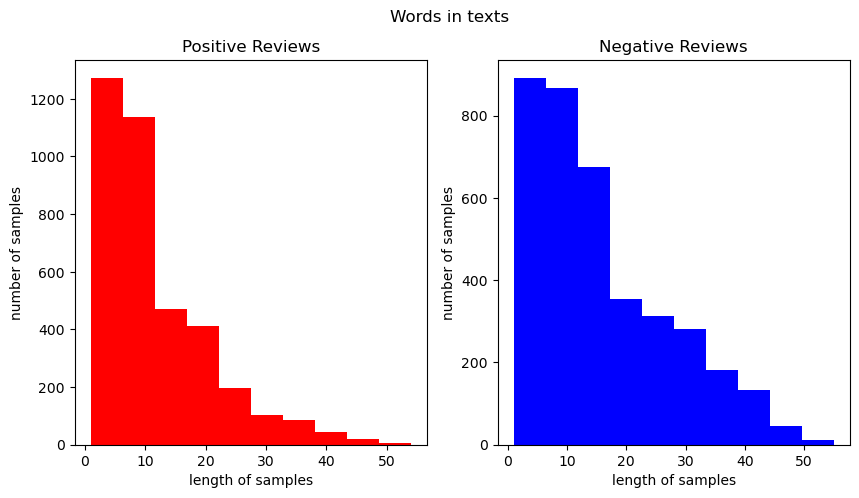

In [134]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
text_len = train_data[train_data['label']==1]['tokenized'].map(lambda x: len(x))
ax1.hist(text_len, color='red')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('length of samples')
ax1.set_ylabel('number of samples')
print('Í∏çÏ†ï Î¶¨Î∑∞Ïùò ÌèâÍ∑† Í∏∏Ïù¥ :', np.mean(text_len))

text_len = train_data[train_data['label']==0]['tokenized'].map(lambda x: len(x))
ax2.hist(text_len, color='blue')
ax2.set_title('Negative Reviews')
fig.suptitle('Words in texts')
ax2.set_xlabel('length of samples')
ax2.set_ylabel('number of samples')
print('Î∂ÄÏ†ï Î¶¨Î∑∞Ïùò ÌèâÍ∑† Í∏∏Ïù¥ :', np.mean(text_len))
plt.show()

In [135]:
# test Îç∞Ïù¥ÌÑ∞

In [136]:
test_data['tokenized'] = test_data['reviews'].apply(okt.morphs)
test_data['tokenized'] = test_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

In [137]:
X_train = train_data['tokenized'].values
y_train = train_data['label'].values
X_test= test_data['tokenized'].values
y_test = test_data['label'].values

In [138]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [139]:
tokenizer.word_index

{'.': 1,
 'Ïûò': 2,
 'Î∞∞ÏÜ°': 3,
 'ÎÑàÎ¨¥': 4,
 '..': 5,
 'Ïöî': 6,
 'Ïïà': 7,
 'Ï¢ãÏïÑÏöî': 8,
 'Ïû¨Íµ¨Îß§': 9,
 'Íµ¨Îß§': 10,
 '~': 11,
 '...': 12,
 'ÏúºÎ°ú': 13,
 'ÏÇ¨Ïö©': 14,
 'Í∑∏ÎÉ•': 15,
 'Î°ú': 16,
 'Ï†úÌíà': 17,
 'ÌñàÎäîÎç∞': 18,
 'Î≥¥Îã§': 19,
 'Í∞ÄÍ≤©': 20,
 'ÌïòÍ≥†': 21,
 'ÏÉùÍ∞Å': 22,
 'Ï¢Ä': 23,
 'Í∞ôÏïÑÏöî': 24,
 'Ï£ºÎ¨∏': 25,
 'ÏûÖÎãàÎã§': 26,
 ',': 27,
 'Îßõ': 28,
 '!': 29,
 'Î™ª': 30,
 'Îïå': 31,
 'ÎßéÏù¥': 32,
 'Îßå': 33,
 'Ìï¥ÏÑú': 34,
 'Îçî': 35,
 'Î≥ÑÎ°ú': 36,
 'Í≤É': 37,
 'Í∞ú': 38,
 'Ìï©ÎãàÎã§': 39,
 'ÏÇ¨Ïù¥Ï¶à': 40,
 '„Ö†„Ö†': 41,
 'ÏóêÏÑú': 42,
 'ÏÑú': 43,
 'Í±∞': 44,
 'ÏÉÅÌíà': 45,
 'Ìè¨Ïû•': 46,
 'Îã§Î•∏': 47,
 'Ï¢ãÎÑ§Ïöî': 48,
 'ÎÉÑÏÉà': 49,
 '?': 50,
 '„Ö†': 51,
 'Ï†ïÎßê': 52,
 'ÌïòÎÇò': 53,
 '^^': 54,
 'ÌñàÏñ¥Ïöî': 55,
 'Î∂ÄÎ∂Ñ': 56,
 'ÏßÑÏßú': 57,
 'Îπ†Î•¥Í≥†': 58,
 'Ï°∞Í∏à': 59,
 'Ìï†': 60,
 '~~': 61,
 'Ï†ú': 62,
 'ÎÇò': 63,
 'ÎÑò': 64,
 'ÏÉÄÎäîÎç∞': 65,
 'Ï†Ä': 66,
 'Ïù∏Îç∞': 67,
 'Ïù¥Îùº': 68,
 'Íµ¨ÏûÖ': 69,
 'Ï¢ãÏäµÎãàÎã§': 70,
 'Ï¢ãÏùÄ': 71,
 'Î∞ò

In [140]:
threshold = 2
total_cnt = len(tokenizer.word_index)
rare_cnt = 0
total_freq = 0
rare_freq = 0

for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('Îã®Ïñ¥ ÏßëÌï©(vocabulary)Ïùò ÌÅ¨Í∏∞ :',total_cnt)
print('Îì±Ïû• ÎπàÎèÑÍ∞Ä %sÎ≤à Ïù¥ÌïòÏù∏ Ìù¨Í∑Ä Îã®Ïñ¥Ïùò Ïàò: %s'%(threshold - 1, rare_cnt))
print("Îã®Ïñ¥ ÏßëÌï©ÏóêÏÑú Ìù¨Í∑Ä Îã®Ïñ¥Ïùò ÎπÑÏú®:", (rare_cnt / total_cnt)*100)
print("Ï†ÑÏ≤¥ Îì±Ïû• ÎπàÎèÑÏóêÏÑú Ìù¨Í∑Ä Îã®Ïñ¥ Îì±Ïû• ÎπàÎèÑ ÎπÑÏú®:", (rare_freq / total_freq)*100)

Îã®Ïñ¥ ÏßëÌï©(vocabulary)Ïùò ÌÅ¨Í∏∞ : 17396
Îì±Ïû• ÎπàÎèÑÍ∞Ä 1Î≤à Ïù¥ÌïòÏù∏ Ìù¨Í∑Ä Îã®Ïñ¥Ïùò Ïàò: 10386
Îã®Ïñ¥ ÏßëÌï©ÏóêÏÑú Ìù¨Í∑Ä Îã®Ïñ¥Ïùò ÎπÑÏú®: 59.70338008737641
Ï†ÑÏ≤¥ Îì±Ïû• ÎπàÎèÑÏóêÏÑú Ìù¨Í∑Ä Îã®Ïñ¥ Îì±Ïû• ÎπàÎèÑ ÎπÑÏú®: 10.022387771644729


In [141]:
#0 Ìå®Îî©ÌÜ†ÌÅ∞, OOV ÌÜ†ÌÅ∞(ÏÇ¨Ï†ÑÏóê ÏóÜÎäî Îã®Ïñ¥Í∞Ä ÎÇòÏò§Î©¥ Ïñ¥ÎñªÍ≤å ÌëúÌòÑÌï† Í≤ÉÏù¥ÎÉê)
# oov : out of vocabulary : ÏÇ¨Ï†ÑÏóê ÏóÜÎäî Îã®Ïñ¥
vocab_size = total_cnt - rare_cnt + 2 
print('Îã®Ïñ¥ ÏßëÌï©Ïùò ÌÅ¨Í∏∞ :',vocab_size)

Îã®Ïñ¥ ÏßëÌï©Ïùò ÌÅ¨Í∏∞ : 7012


In [142]:
# ÎÇòÎäî Ïò§Îäò ÌïôÍµêÏóê Í∞îÏäµÎãàÎã§
#[0,0,0,........5,1,100,50]

In [143]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)
# ÌÜ†ÌÅ∞Ìôî Í≥ºÏ†ïÏóêÏÑú ÏÇ¨Ï†ÑÏóê ÏóÜÎäî Îã®Ïñ¥Îäî OOVÎ°ú ÌëúÌòÑ
# oov_token : OOV

In [144]:
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [145]:
X_train

[[581, 24, 1870, 2, 223, 33, 961, 61, 136, 3501, 1091, 2],
 [58,
  37,
  191,
  37,
  2428,
  5,
  4664,
  105,
  873,
  17,
  4665,
  126,
  4666,
  86,
  3502,
  108,
  1,
  1092,
  1277,
  14,
  358,
  787,
  4667,
  217,
  5,
  33,
  202],
 [582, 88, 962, 217, 1176, 452, 441, 101, 338, 916, 1389, 52],
 [392,
  329,
  546,
  874,
  51,
  727,
  788,
  453,
  1,
  1,
  1278,
  1279,
  2110,
  4668,
  339,
  833,
  13,
  290,
  761,
  8,
  22,
  3503,
  535,
  51],
 [10, 4669, 1530, 1, 102, 14, 26, 35, 536, 2111],
 [185, 359, 11, 1, 2859],
 [3,
  2112,
  12,
  2113,
  47,
  3,
  2429,
  1871,
  12,
  157,
  112,
  1,
  1,
  4670,
  3,
  537,
  21,
  2860,
  4671,
  6,
  231,
  33,
  2111,
  12],
 [628, 406, 4672, 2, 52],
 [5, 2114, 1, 1280, 873, 490, 1, 2861, 1678, 917],
 [407, 1679, 60, 1, 1872, 4673, 1, 429, 9, 2],
 [3, 1281, 3504, 195, 323, 1],
 [629, 70, 2862, 1, 20, 514, 4674, 29, 1, 2, 91, 127, 1, 2430, 875, 25],
 [2431, 4675, 1, 50, 1531, 43, 1873, 116, 4676],
 [209,
  1390,
  

In [146]:
X_train
X_test

[[80,
  21,
  465,
  679,
  49,
  80,
  143,
  6980,
  1322,
  74,
  2979,
  5781,
  498,
  141,
  80,
  4497,
  113],
 [4, 208, 1],
 [5, 9, 173, 9, 173, 9],
 [1, 1, 50, 6471],
 [37, 138, 117, 5, 1200, 127, 148, 1592],
 [1, 271, 1, 328],
 [697, 100, 1102],
 [487, 22, 9],
 [85, 176, 3519, 1336, 489, 3, 1809, 25],
 [197, 336, 1, 690, 9],
 [81, 3672, 153, 844],
 [4191, 1, 78, 1077, 452, 608, 17, 487, 40],
 [1799, 1633, 9],
 [1431, 2751, 43, 144, 3, 165, 187, 1, 1001, 3, 704, 1, 235],
 [53, 256, 1371, 1755, 947, 2230, 83, 852],
 [392, 295, 535, 5, 1042, 7],
 [1,
  349,
  338,
  1068,
  2777,
  935,
  897,
  1,
  399,
  1602,
  127,
  309,
  1,
  1399,
  901,
  34,
  753,
  1,
  1082,
  244,
  2235,
  6380,
  124],
 [744, 611, 3623, 1, 126, 39, 770, 291, 771],
 [10, 616, 585, 1, 1986, 1, 813, 48, 122, 17, 155, 1942, 7],
 [1571, 306, 320, 1988, 3, 136, 1, 1829, 1, 608, 17],
 [47, 65, 350, 1363, 116, 253, 283, 2401, 266, 8, 4653, 472, 1010, 27],
 [562, 377, 515, 4, 1, 169, 1],
 [244, 37, 97, 

In [147]:
print(tokenizer.word_index)

{'OOV': 1, '.': 2, 'Ïûò': 3, 'Î∞∞ÏÜ°': 4, 'ÎÑàÎ¨¥': 5, '..': 6, 'Ïöî': 7, 'Ïïà': 8, 'Ï¢ãÏïÑÏöî': 9, 'Ïû¨Íµ¨Îß§': 10, 'Íµ¨Îß§': 11, '~': 12, '...': 13, 'ÏúºÎ°ú': 14, 'ÏÇ¨Ïö©': 15, 'Í∑∏ÎÉ•': 16, 'Î°ú': 17, 'Ï†úÌíà': 18, 'ÌñàÎäîÎç∞': 19, 'Î≥¥Îã§': 20, 'Í∞ÄÍ≤©': 21, 'ÌïòÍ≥†': 22, 'ÏÉùÍ∞Å': 23, 'Ï¢Ä': 24, 'Í∞ôÏïÑÏöî': 25, 'Ï£ºÎ¨∏': 26, 'ÏûÖÎãàÎã§': 27, ',': 28, 'Îßõ': 29, '!': 30, 'Î™ª': 31, 'Îïå': 32, 'ÎßéÏù¥': 33, 'Îßå': 34, 'Ìï¥ÏÑú': 35, 'Îçî': 36, 'Î≥ÑÎ°ú': 37, 'Í≤É': 38, 'Í∞ú': 39, 'Ìï©ÎãàÎã§': 40, 'ÏÇ¨Ïù¥Ï¶à': 41, '„Ö†„Ö†': 42, 'ÏóêÏÑú': 43, 'ÏÑú': 44, 'Í±∞': 45, 'ÏÉÅÌíà': 46, 'Ìè¨Ïû•': 47, 'Îã§Î•∏': 48, 'Ï¢ãÎÑ§Ïöî': 49, 'ÎÉÑÏÉà': 50, '?': 51, '„Ö†': 52, 'Ï†ïÎßê': 53, 'ÌïòÎÇò': 54, '^^': 55, 'ÌñàÏñ¥Ïöî': 56, 'Î∂ÄÎ∂Ñ': 57, 'ÏßÑÏßú': 58, 'Îπ†Î•¥Í≥†': 59, 'Ï°∞Í∏à': 60, 'Ìï†': 61, '~~': 62, 'Ï†ú': 63, 'ÎÇò': 64, 'ÎÑò': 65, 'ÏÉÄÎäîÎç∞': 66, 'Ï†Ä': 67, 'Ïù∏Îç∞': 68, 'Ïù¥Îùº': 69, 'Íµ¨ÏûÖ': 70, 'Ï¢ãÏäµÎãàÎã§': 71, 'Ï¢ãÏùÄ': 72, 'Î∞òÌíà': 73, 'Îòê': 74, 'ÏÇ¨ÏßÑ': 75, 'Îëê': 76, 'Ï†ïÎèÑ': 77, 

Î¶¨Î∑∞Ïùò ÏµúÎåÄ Í∏∏Ïù¥ : 55
Î¶¨Î∑∞Ïùò ÌèâÍ∑† Í∏∏Ïù¥ : 13.817066666666667


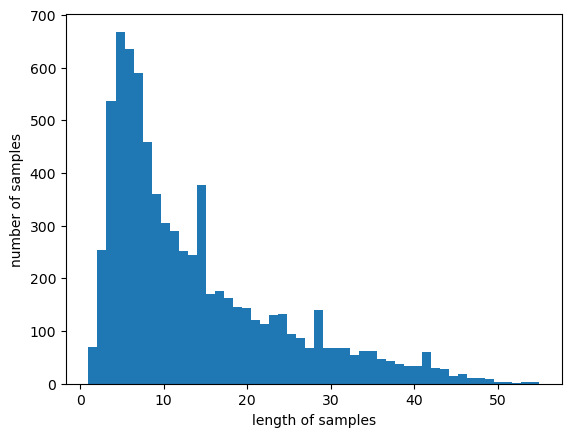

In [148]:
print('Î¶¨Î∑∞Ïùò ÏµúÎåÄ Í∏∏Ïù¥ :',max(len(l) for l in X_train))
print('Î¶¨Î∑∞Ïùò ÌèâÍ∑† Í∏∏Ïù¥ :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [149]:
X_train = pad_sequences(X_train, maxlen = 51)
X_test = pad_sequences(X_test, maxlen = 51)

In [150]:
X_train[2]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,  582,   88,  962,  217, 1176,
        452,  441,  101,  338,  916, 1389,   52])

In [151]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [152]:
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

In [153]:
es = EarlyStopping(monitor='val_loss', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [154]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=60, validation_split=0.2)

Epoch 1/15
100/100 [==============================] - ETA: 0s - loss: 0.5645 - acc: 0.7195
Epoch 1: val_acc improved from -inf to 0.81400, saving model to best_model.h5
100/100 [==============================] - 6s 48ms/step - loss: 0.5645 - acc: 0.7195 - val_loss: 0.4262 - val_acc: 0.8140
Epoch 2/15
  3/100 [..............................] - ETA: 4s - loss: 0.3513 - acc: 0.8778

C:\Users\user\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


 99/100 [============================>.] - ETA: 0s - loss: 0.3358 - acc: 0.8712
Epoch 2: val_acc improved from 0.81400 to 0.85400, saving model to best_model.h5
100/100 [==============================] - 4s 41ms/step - loss: 0.3372 - acc: 0.8705 - val_loss: 0.3603 - val_acc: 0.8540
Epoch 3/15
 99/100 [============================>.] - ETA: 0s - loss: 0.2386 - acc: 0.9168
Epoch 3: val_acc improved from 0.85400 to 0.86067, saving model to best_model.h5
100/100 [==============================] - 4s 39ms/step - loss: 0.2402 - acc: 0.9162 - val_loss: 0.3598 - val_acc: 0.8607
Epoch 4/15
100/100 [==============================] - ETA: 0s - loss: 0.2004 - acc: 0.9327
Epoch 4: val_acc did not improve from 0.86067
100/100 [==============================] - 4s 41ms/step - loss: 0.2004 - acc: 0.9327 - val_loss: 0.3595 - val_acc: 0.8587
Epoch 5/15
 99/100 [============================>.] - ETA: 0s - loss: 0.1604 - acc: 0.9480
Epoch 5: val_acc did not improve from 0.86067
100/100 [==================

In [155]:
loaded_model = load_model('best_model.h5')

In [156]:
loaded_model.evaluate(X_test, y_test)[1]

79/79 [==============================] - 2s 15ms/step - loss: 0.3745 - acc: 0.8444


0.8443999886512756

In [158]:
# def sentiment_predict(new_sentence):
    # Íµ¨ÌòÑ, ÌïúÍ∏Ä Í≥µÎ∞±ÏùÑ Ï†úÏô∏Ìïú ÎÇòÎ®∏ÏßÄ Ï†úÍ±∞, ÌÜ†ÌÅ∞Ìôî, Î∂àÏö©Ïñ¥ Ï†úÍ±∞, Ï†ïÏàò Ïù∏ÏΩîÎî©, Ìå®Îî©, ÏòàÏ∏°
# Ïù¥ Ï†úÌíà ÎÑàÎ¨¥ Ï¢ãÏùÄÎç∞Ïöî. Ï†ïÎßê Ï¢ãÏïÑÏöî. Í∞ïÏ∂îÌï©ÎãàÎã§. => Í∏çÏ†ï/ Î∂ÄÏ†ï Ï∂úÎ†•
# Ïù¥Í≤ÉÎèÑ ÏÉÅÌíàÏù∏Í∞ÄÏöî? Ï†ïÎßê ÌôîÍ∞Ä ÎÇ©ÎãàÎã§. Î∂ÑÎÖ∏Í∞Ä ÏπòÎ∞ÄÏñ¥Ïöî. Íπ®ÏßúÏ¶ùÎÇ©ÎãàÎã§ => Í∏çÏ†ï/ Î∂ÄÏ†ï